# Title: Cardiovascular Disease Prediction Using Machine Learning
**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Data Dictionary
**age**: Age of the patient in years.

**sex**: Sex of the patient (1 = male; 0 = female).

**cp**: Chest pain type.

0: Typical angina

1: Atypical angina

2: Non-anginal pain

3: Asymptomatic

**trestbps**: Resting blood pressure in mm Hg on admission to the hospital.

**chol**: Serum cholesterol level in mg/dl.

**fbs**: Fasting blood sugar level > 120 mg/dl (1 = true; 0 = false).

**restecg**: Resting electrocardiographic results.

0: Normal

1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: Maximum heart rate achieved during exercise.

**exang**: Exercise induced angina (1 = yes; 0 = no).

**oldpeak**: ST depression induced by exercise relative to rest.

**slope**: The slope of the peak exercise ST segment.

0: Upsloping

1: Flat

2: Downsloping

**ca**: Number of major vessels (0-3) colored by fluoroscopy.

**thal**: Thallium stress test result.

0: Normal

1: Fixed defect

2: Reversible defect

**condition**: Heart condition label.

0: No disease

1: Disease

### Importing necessary libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier class
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

### Loading the Dataset

In [99]:
data = pd.read_csv(r'C:\Users\Ansar Atiq\Desktop\heart.csv')

In [100]:
# Check for missing values
missing_values = data.isnull().sum()

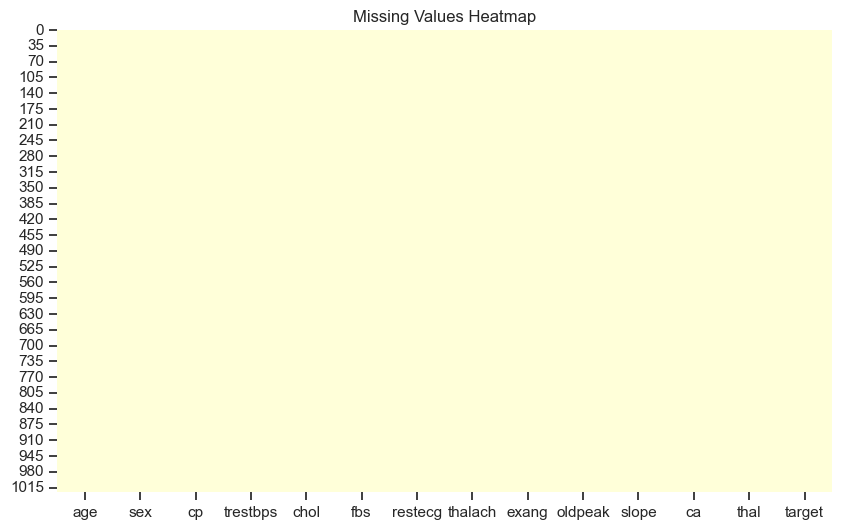

In [101]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap="YlGnBu", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### Exploratory Data Analysis (EDA)

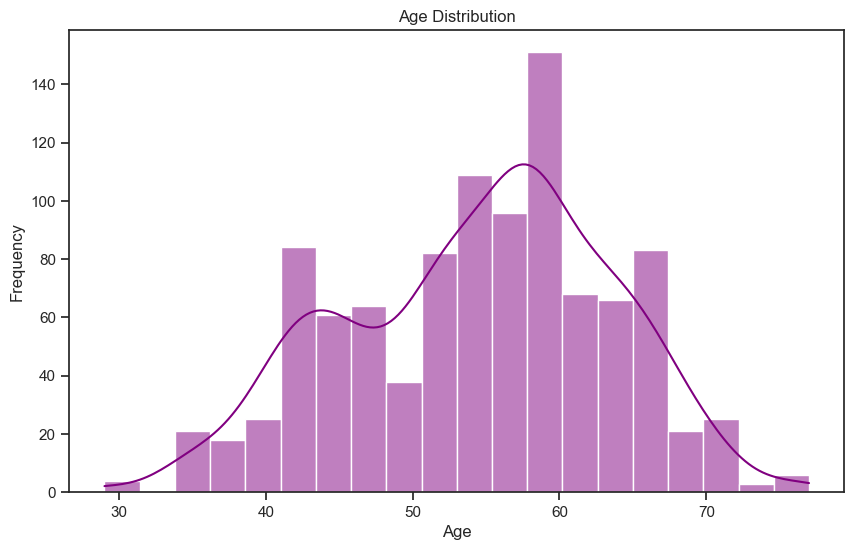

In [153]:
# Visualizing the distribution of age using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=20, kde=True, color='purple')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

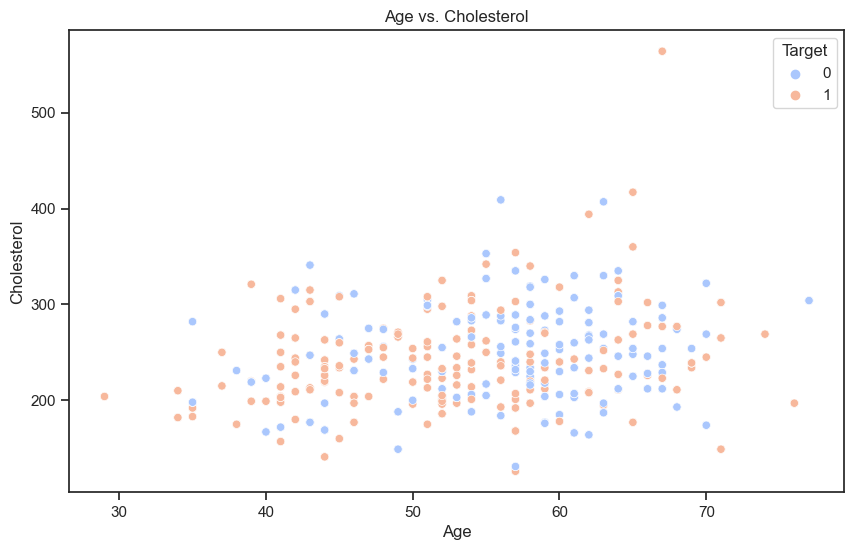

In [103]:
# Visualize the relationship between age and cholesterol using a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol', hue='target', palette='coolwarm')
plt.title("Age vs. Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend(title="Target")
plt.show()

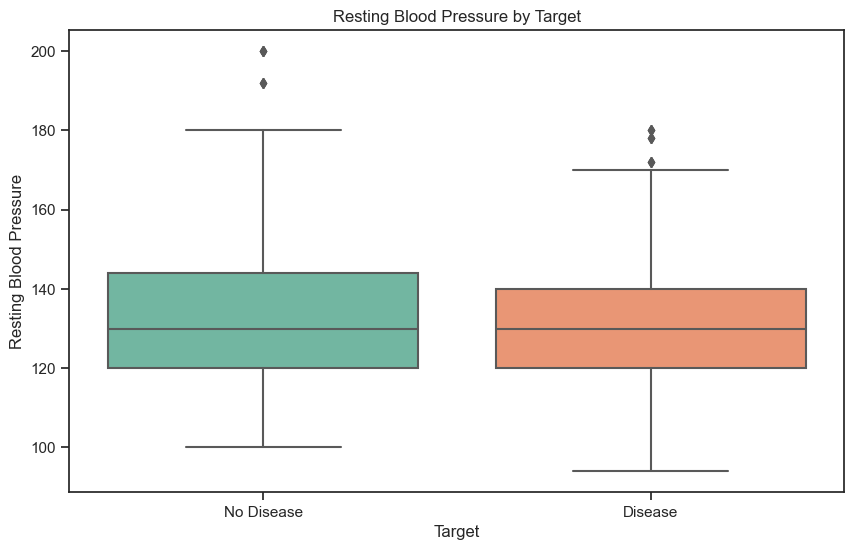

In [104]:
# Visualize box plots for resting blood pressure by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='trestbps', palette='Set2')
plt.title("Resting Blood Pressure by Target")
plt.xlabel("Target")
plt.ylabel("Resting Blood Pressure")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

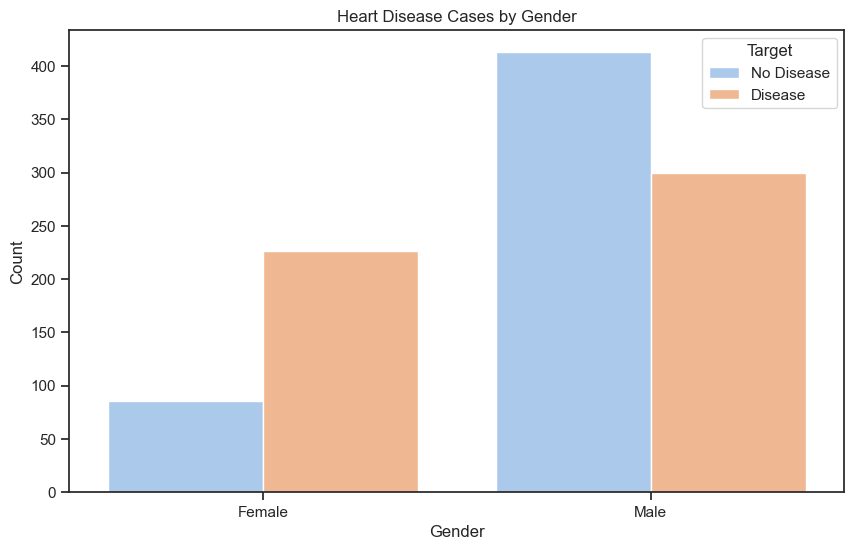

In [105]:
# Visualize a count of heart disease cases by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sex', hue='target', palette='pastel')
plt.title("Heart Disease Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title="Target", labels=['No Disease', 'Disease'])
plt.show()

In [106]:
# Mapping dictionaries for each feature
sex_mapping = {1: 'male', 0: 'female'}
cp_mapping = {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal', 3: 'asymptomatic'}
fbs_mapping = {1: 'high', 0: 'normal'}
restecg_mapping = {0: 'normal', 1: 'ST-T abnormality', 2: 'LV hypertrophy'}
slope_mapping = {0: 'upsloping', 1: 'flat', 2: 'downsloping'}
target_mapping = {0: 'no disease', 1: 'disease'}


In [107]:
# Replace numerical values with their corresponding categories
data['sex'] = data['sex'].map(sex_mapping)
data['cp'] = data['cp'].map(cp_mapping)
data['fbs'] = data['fbs'].map(fbs_mapping)
data['restecg'] = data['restecg'].map(restecg_mapping)
data['slope'] = data['slope'].map(slope_mapping)
data['target'] = data['target'].map(target_mapping)

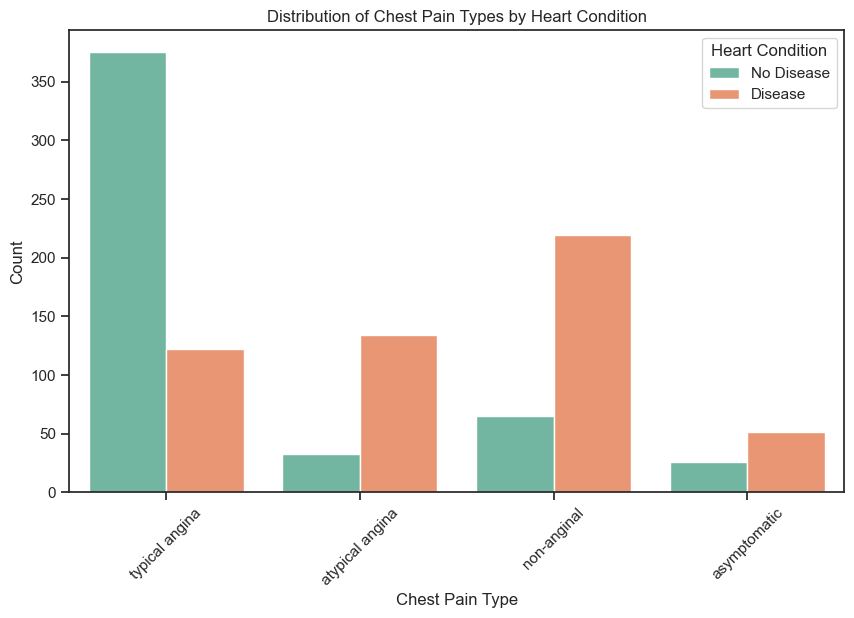

In [108]:
# Visualize the distribution of chest pain types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cp', hue='target', palette='Set2')
plt.title("Distribution of Chest Pain Types by Heart Condition")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Condition", labels=['No Disease', 'Disease'])
plt.xticks(rotation=45)
plt.show()

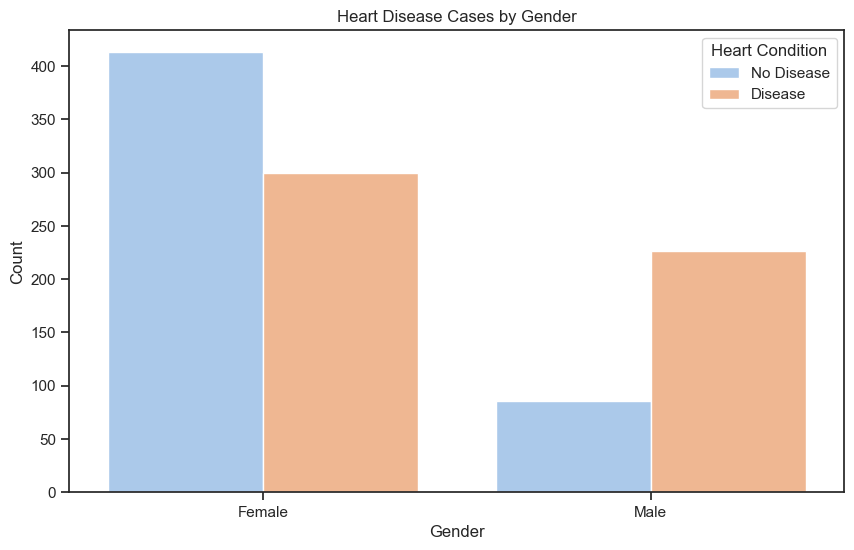

In [109]:
# Visualize heart disease cases by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sex', hue='target', palette='pastel')
plt.title("Heart Disease Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title="Heart Condition", labels=['No Disease', 'Disease'])
plt.show()

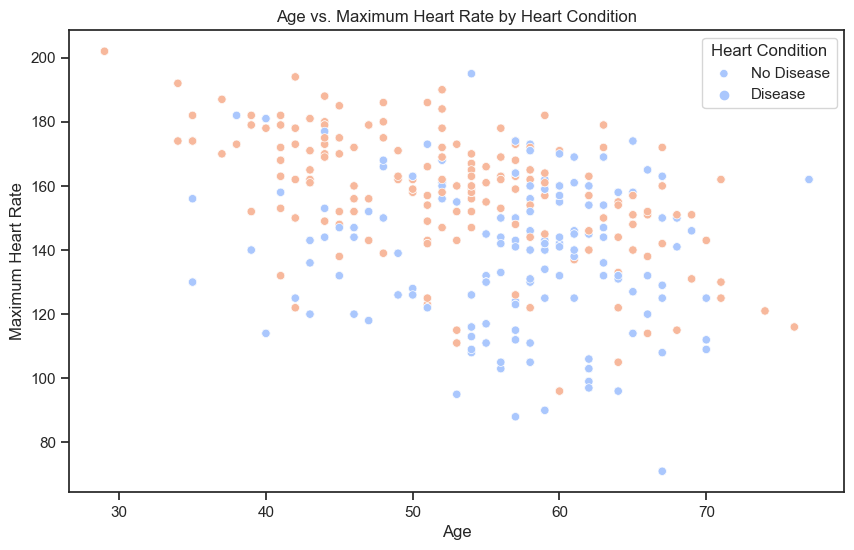

In [110]:
# Visualize the relationship between age, maximum heart rate, and heart condition
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='thalach', hue='target', palette='coolwarm')
plt.title("Age vs. Maximum Heart Rate by Heart Condition")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(title="Heart Condition", labels=['No Disease', 'Disease'])
plt.show()

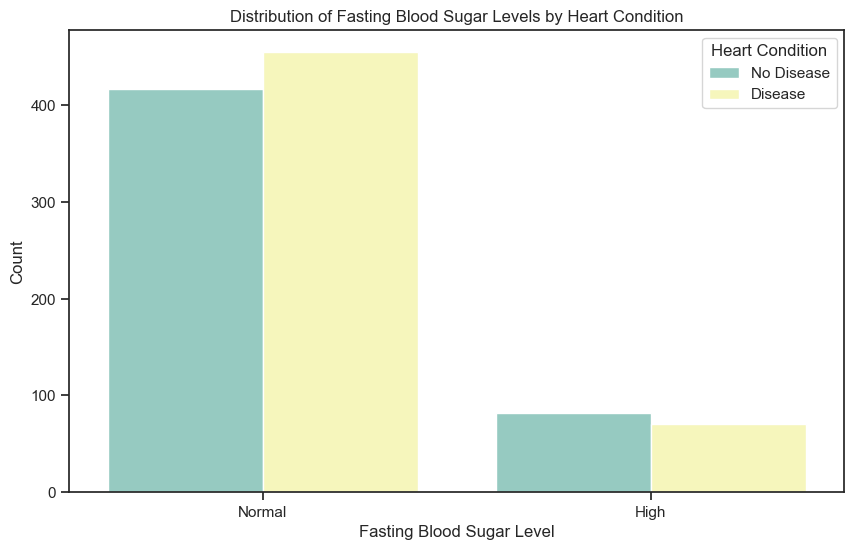

In [111]:
# Visualize the distribution of fasting blood sugar levels by heart condition
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='fbs', hue='target', palette='Set3')
plt.title("Distribution of Fasting Blood Sugar Levels by Heart Condition")
plt.xlabel("Fasting Blood Sugar Level")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal', 'High'])
plt.legend(title="Heart Condition", labels=['No Disease', 'Disease'])
plt.show()

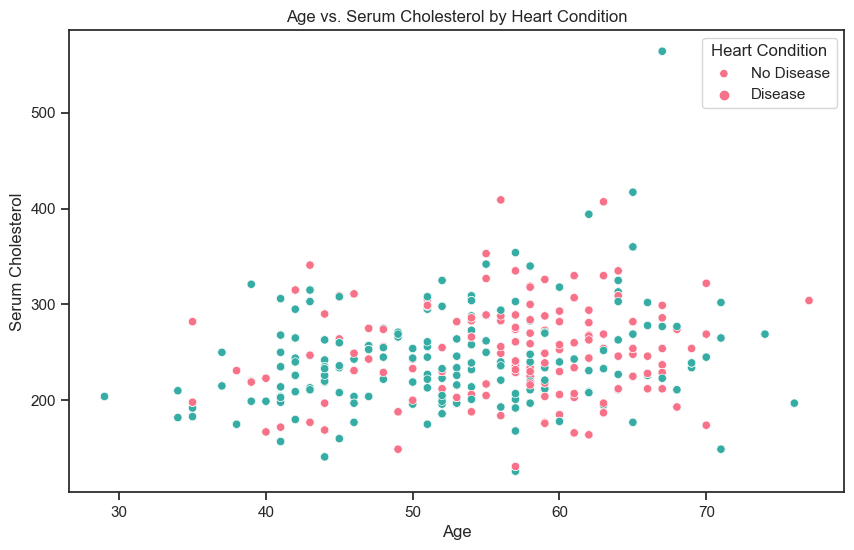

In [112]:
# Visualize the relationship between age, serum cholesterol, and heart condition
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol', hue='target', palette='husl')
plt.title("Age vs. Serum Cholesterol by Heart Condition")
plt.xlabel("Age")
plt.ylabel("Serum Cholesterol")
plt.legend(title="Heart Condition", labels=['No Disease', 'Disease'])
plt.show()

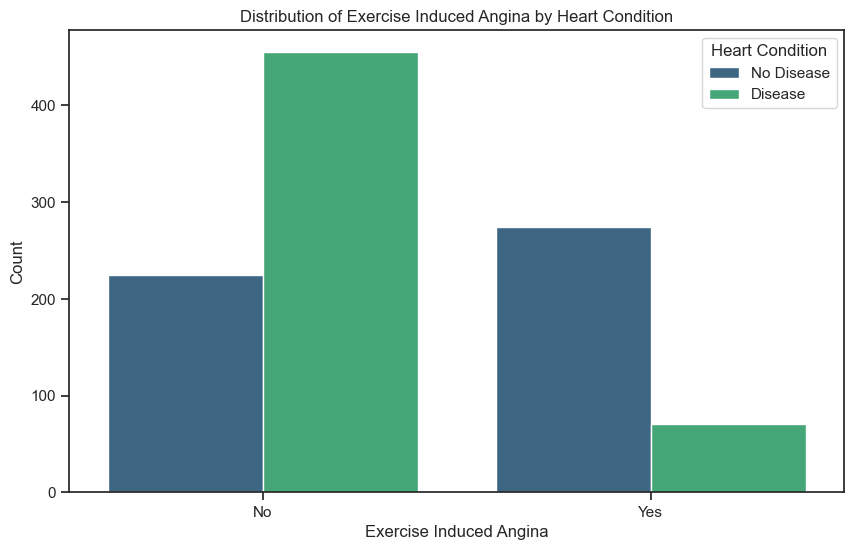

In [113]:
# Visualize the distribution of exercise induced angina by heart condition
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='exang', hue='target', palette='viridis')
plt.title("Distribution of Exercise Induced Angina by Heart Condition")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title="Heart Condition", labels=['No Disease', 'Disease'])
plt.show()

### Univariate Analysis for Numerical Features

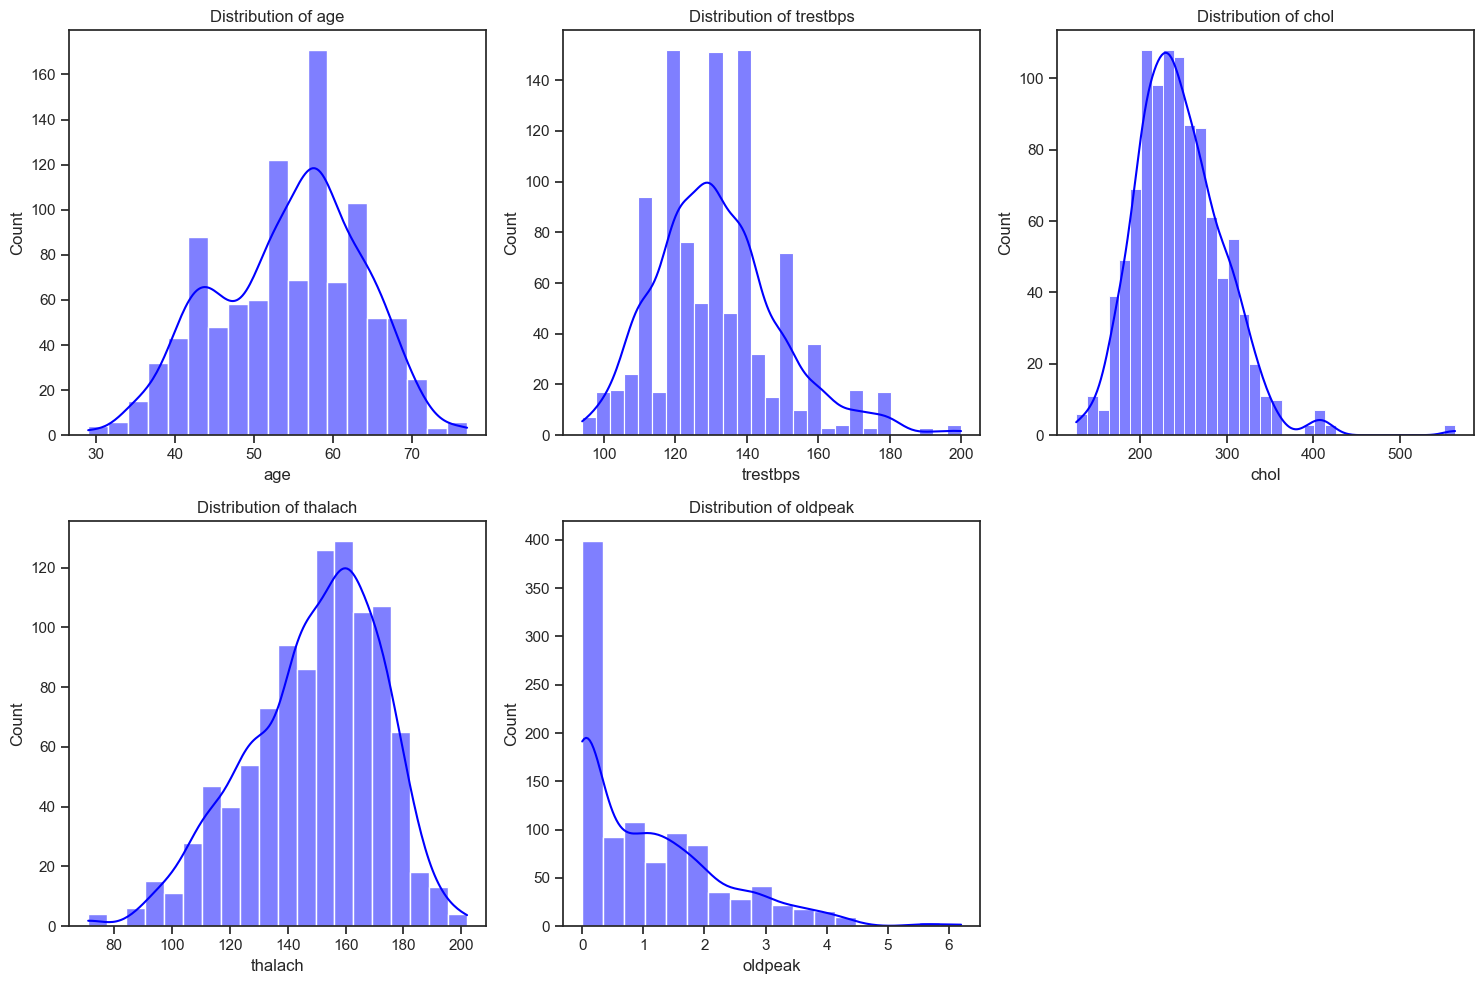

In [114]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

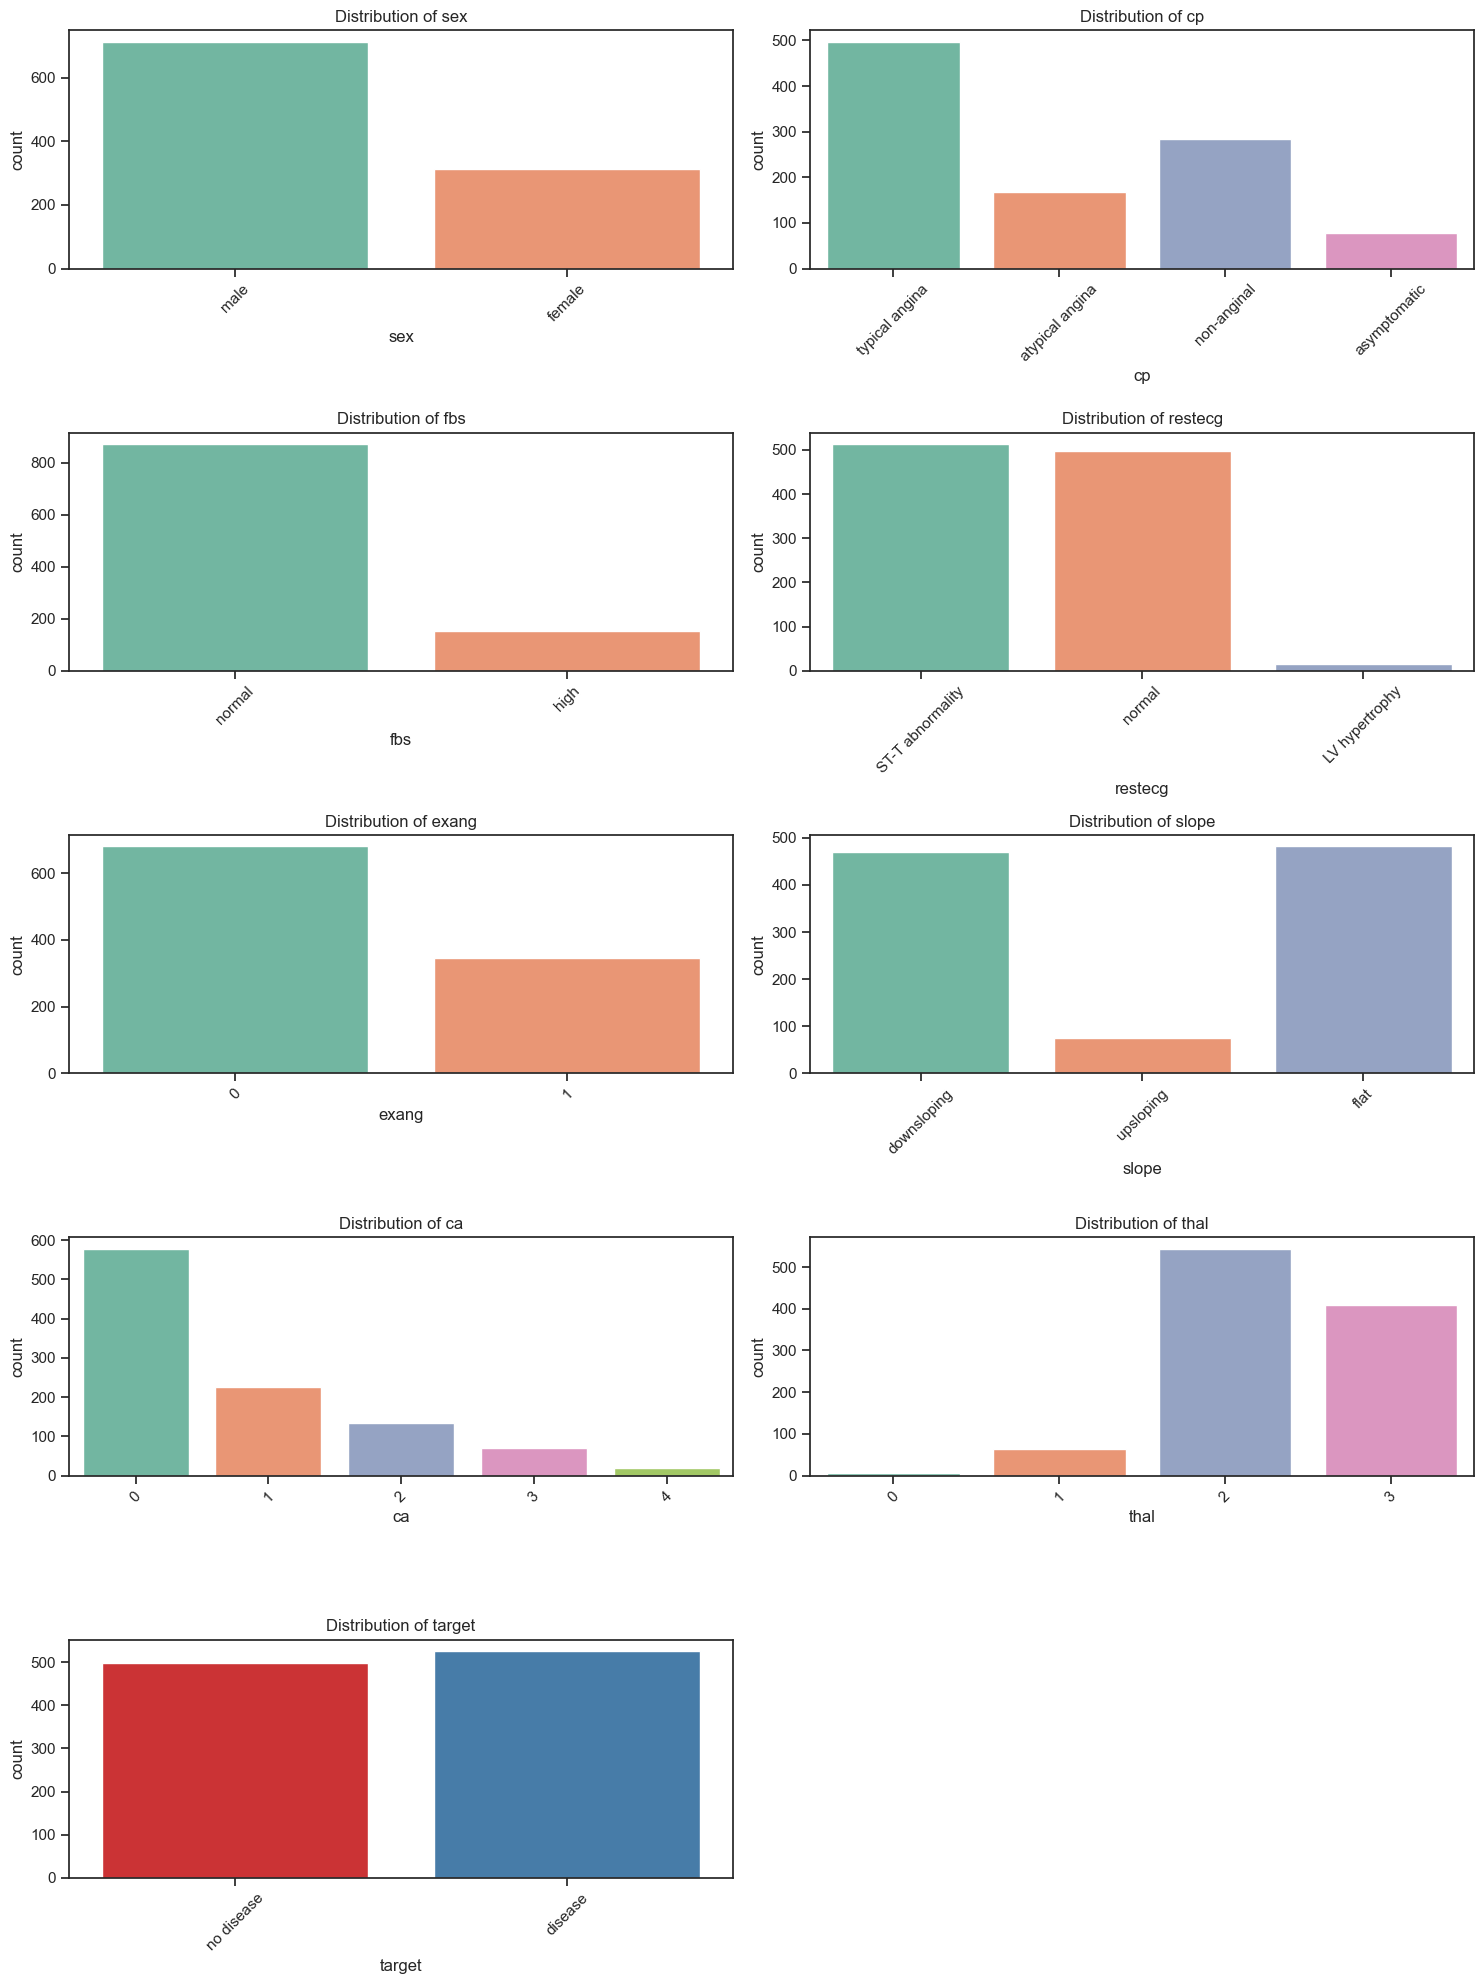

In [115]:
# Univariate Analysis for Categorical Features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    if feature != 'target':
        sns.countplot(data=data, x=feature, palette='Set2')
    else:
        sns.countplot(data=data, x=feature, palette='Set1')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Multivariate Analysis

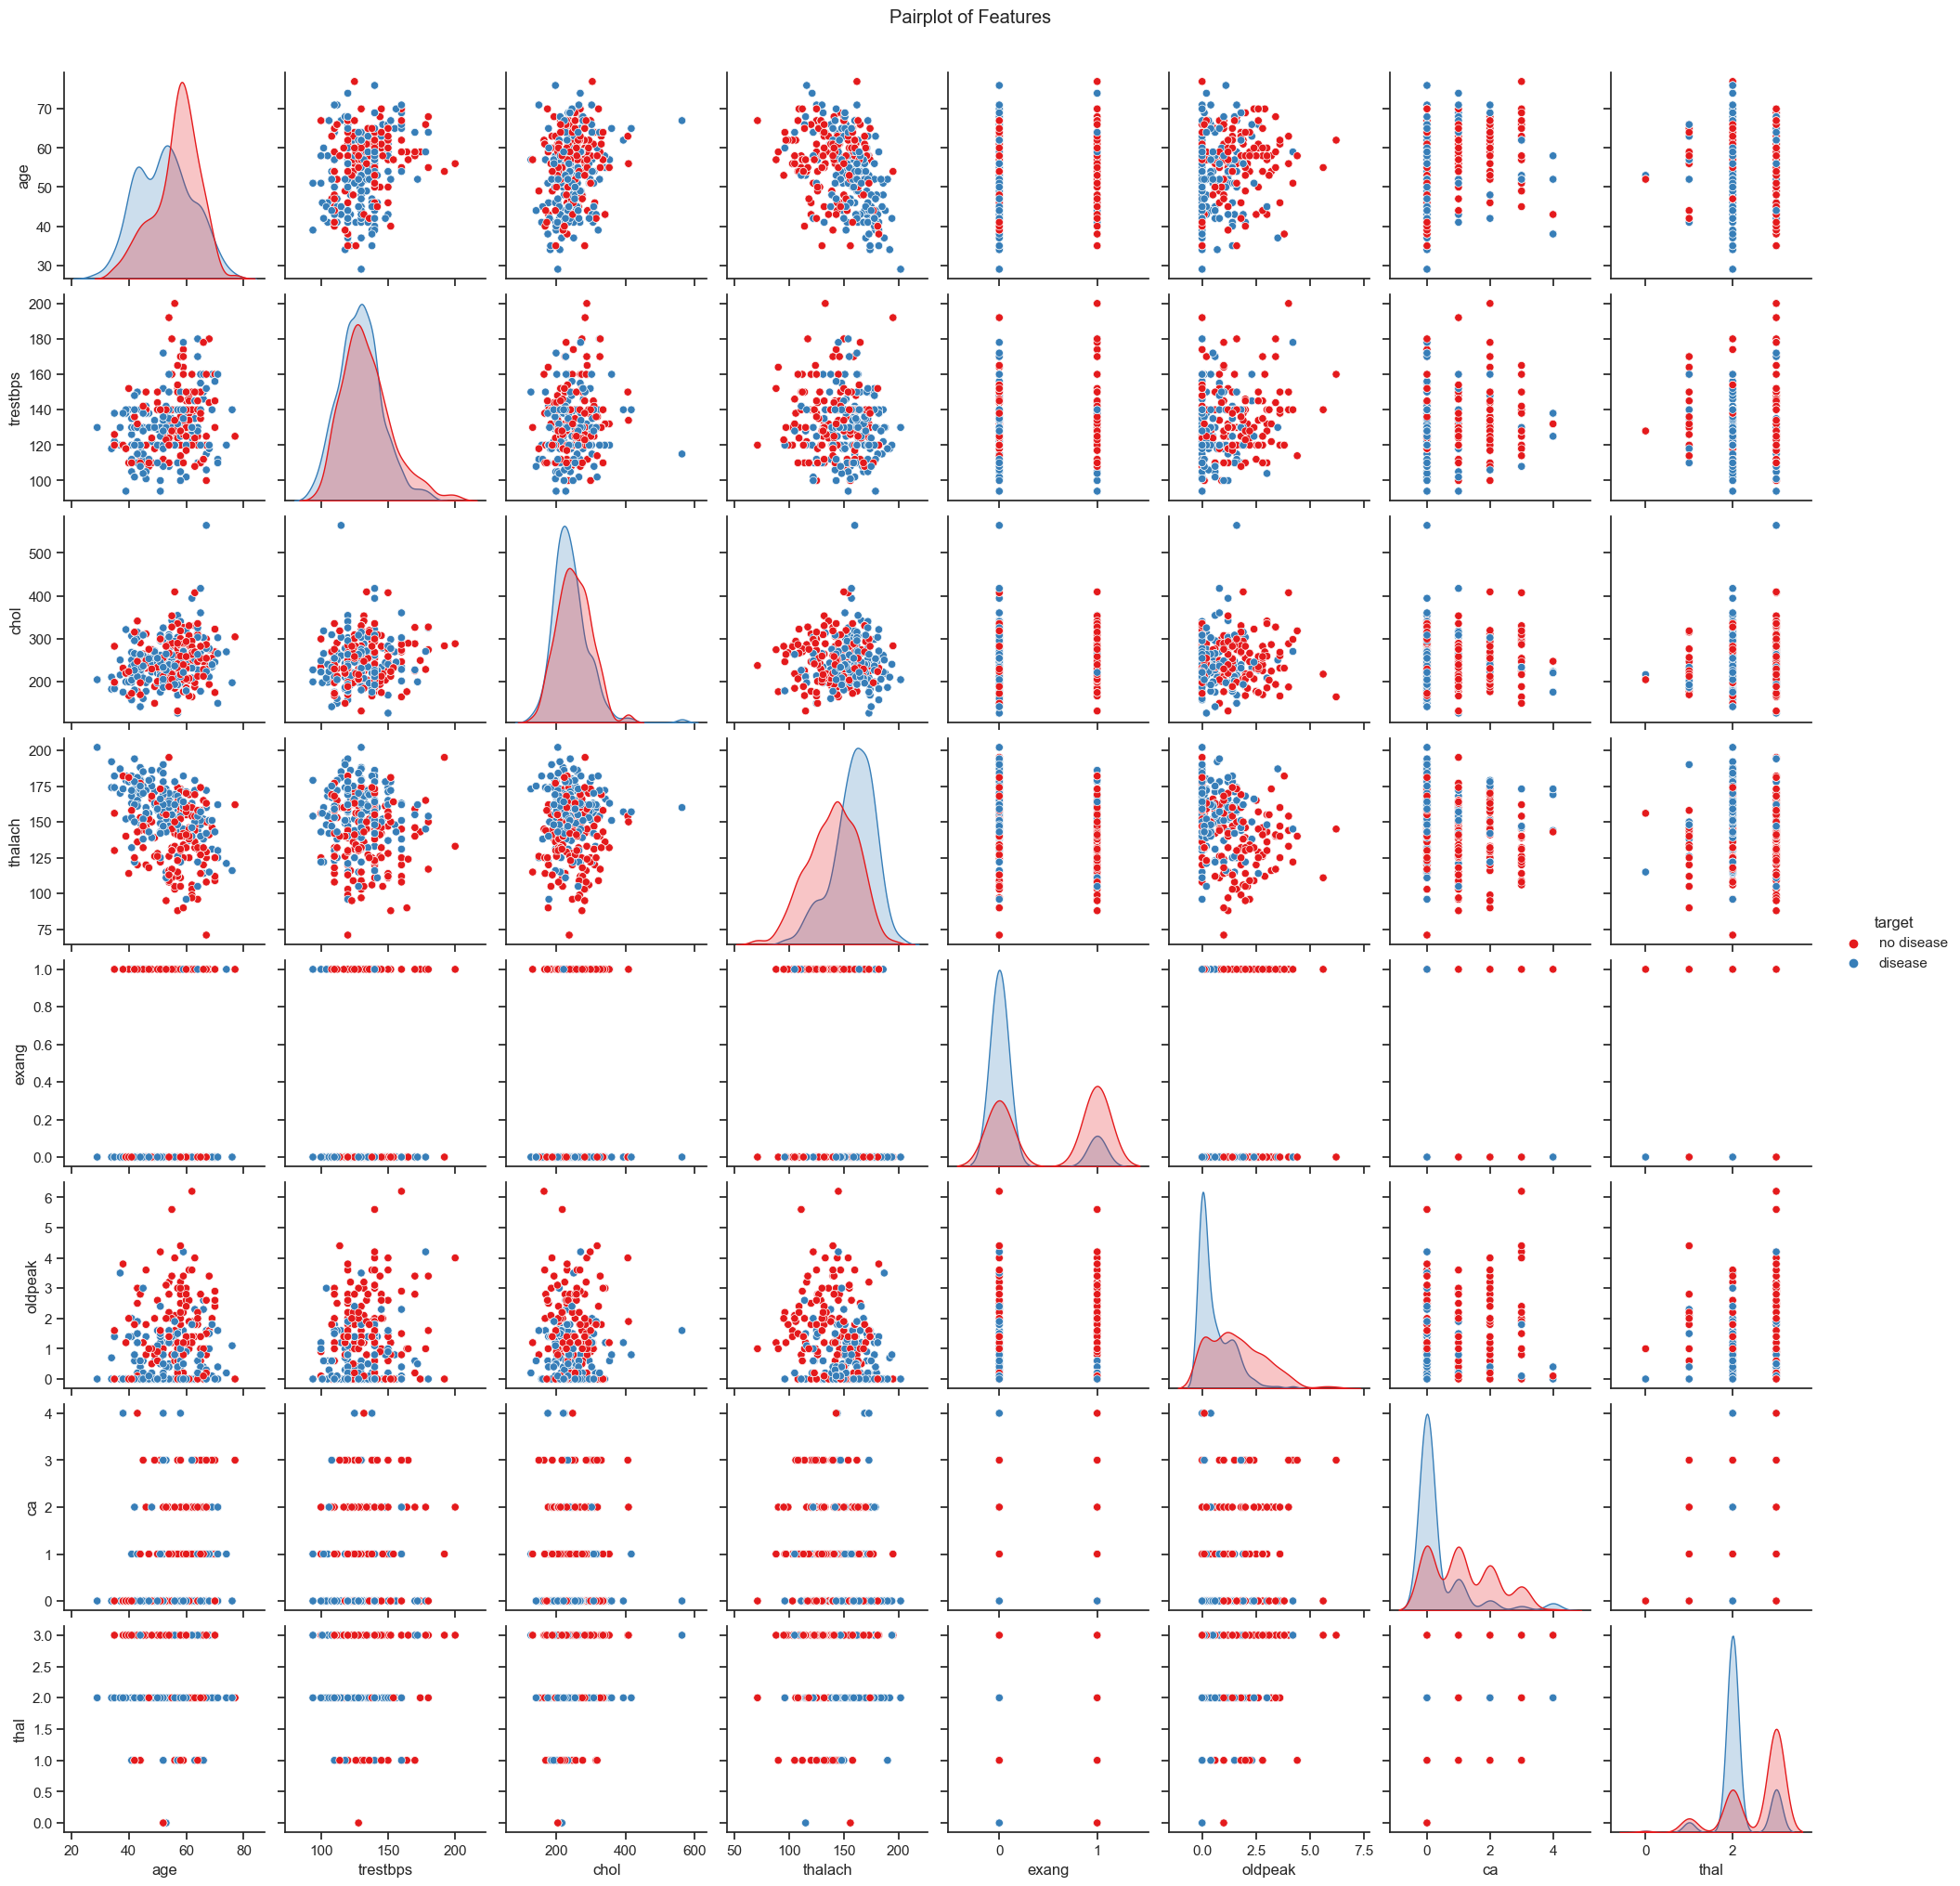

In [118]:
# Pairplot
sns.pairplot(data=data, hue='target', diag_kind='kde', palette='Set1')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

C:\Users\Ansar Atiq\AppData\Local\Temp\ipykernel_30648\832149330.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


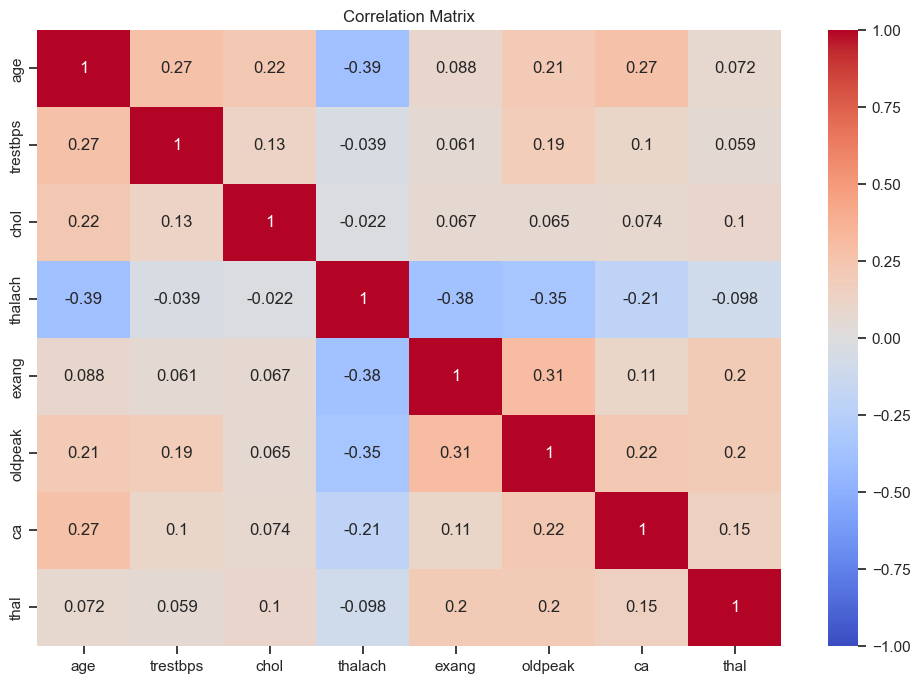

In [119]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

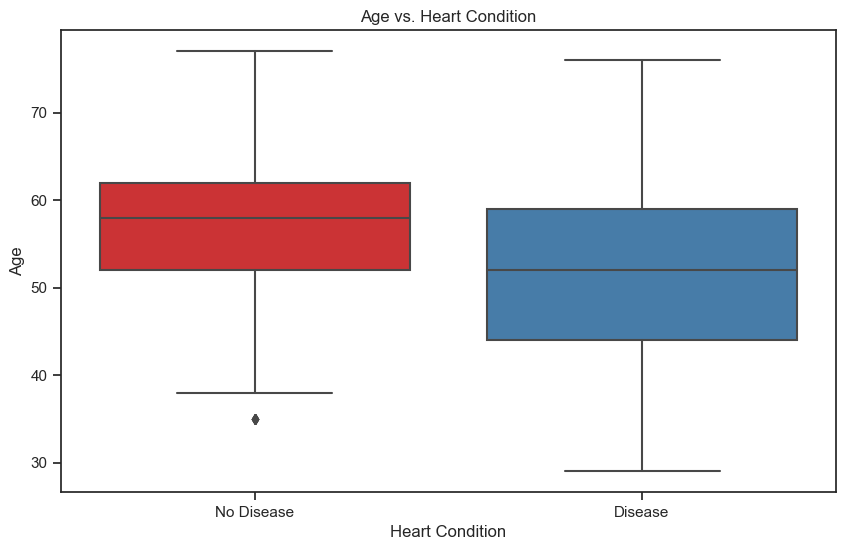

In [120]:
# Boxplot for Age vs. Target
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='age', palette='Set1')
plt.title("Age vs. Heart Condition")
plt.xlabel("Heart Condition")
plt.ylabel("Age")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

C:\Users\Ansar Atiq\AppData\Local\Temp\ipykernel_30648\1293713710.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data, x='target', y='age', palette='Set1')


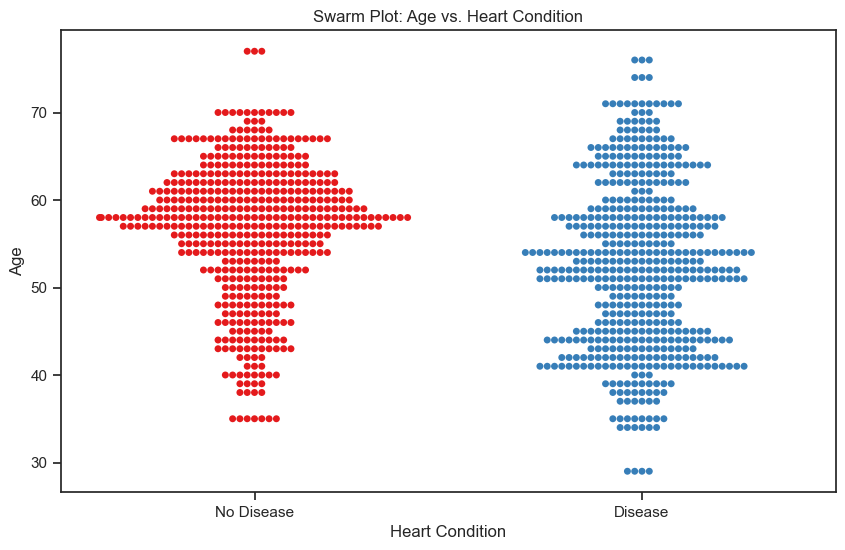

In [121]:
# Swarm Plot for Age vs. Target
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='target', y='age', palette='Set1')
plt.title("Swarm Plot: Age vs. Heart Condition")
plt.xlabel("Heart Condition")
plt.ylabel("Age")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

In [122]:
def grouped_barplot(data, feature1, feature2):
    """
    Create a grouped bar plot for two categorical features.

    data: dataframe
    feature1: first categorical feature
    feature2: second categorical feature
    """
    cross_tab = pd.crosstab(data[feature1], data[feature2], normalize='index') * 100
    ax = cross_tab.plot(kind='bar', figsize=(10, 6), cmap='Set1')
    plt.title(f"Grouped Bar Plot: {feature1.capitalize()} vs. {feature2.capitalize()}")
    plt.xlabel(feature1.capitalize())
    plt.ylabel("Percentage")
    plt.legend(title=feature2.capitalize())
    plt.xticks(rotation=0)
    plt.show()

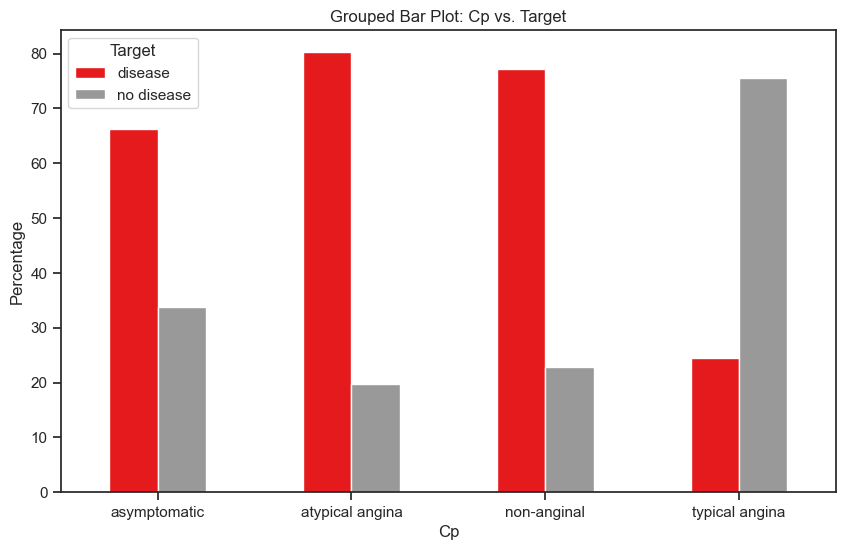

In [123]:
# Create the grouped bar plot for "chest pain type" vs. "target"
grouped_barplot(data, "cp", "target")

In [124]:
def grouped_barplot(data, feature1, feature2, feature3):
    """
    Create a grouped bar plot for three categorical features.

    data: dataframe
    feature1: first categorical feature
    feature2: second categorical feature
    feature3: third categorical feature
    """
    cross_tab = pd.crosstab([data[feature1], data[feature2]], data[feature3], normalize='index') * 100
    ax = cross_tab.plot(kind='bar', figsize=(12, 6), cmap='Set1')
    plt.title(f"Grouped Bar Plot: {feature1.capitalize()}, {feature2.capitalize()} vs. {feature3.capitalize()}")
    plt.xlabel(f"{feature1.capitalize()}, {feature2.capitalize()}")
    plt.ylabel("Percentage")
    plt.legend(title=feature3.capitalize())
    plt.xticks(rotation=45)
    plt.show()

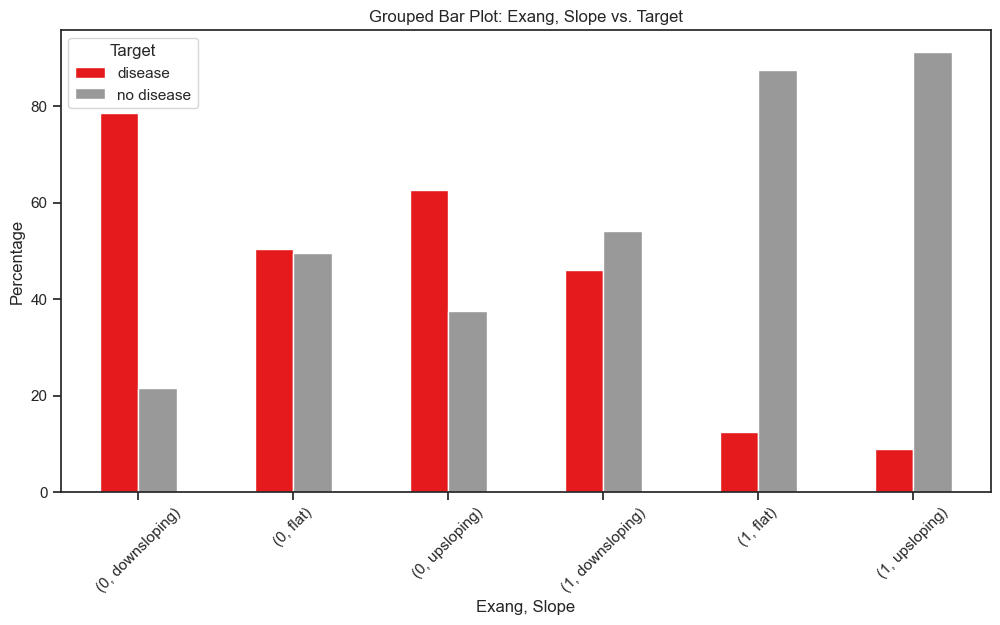

In [125]:
# Create the grouped bar plot for "exang", "slope" vs. "target"
grouped_barplot(data, "exang", "slope", "target")

It provides insights into how the combination of these two features relates to heart disease or no disease.
The plot can help identify any patterns or trends in heart conditions based on these two categorical variables.

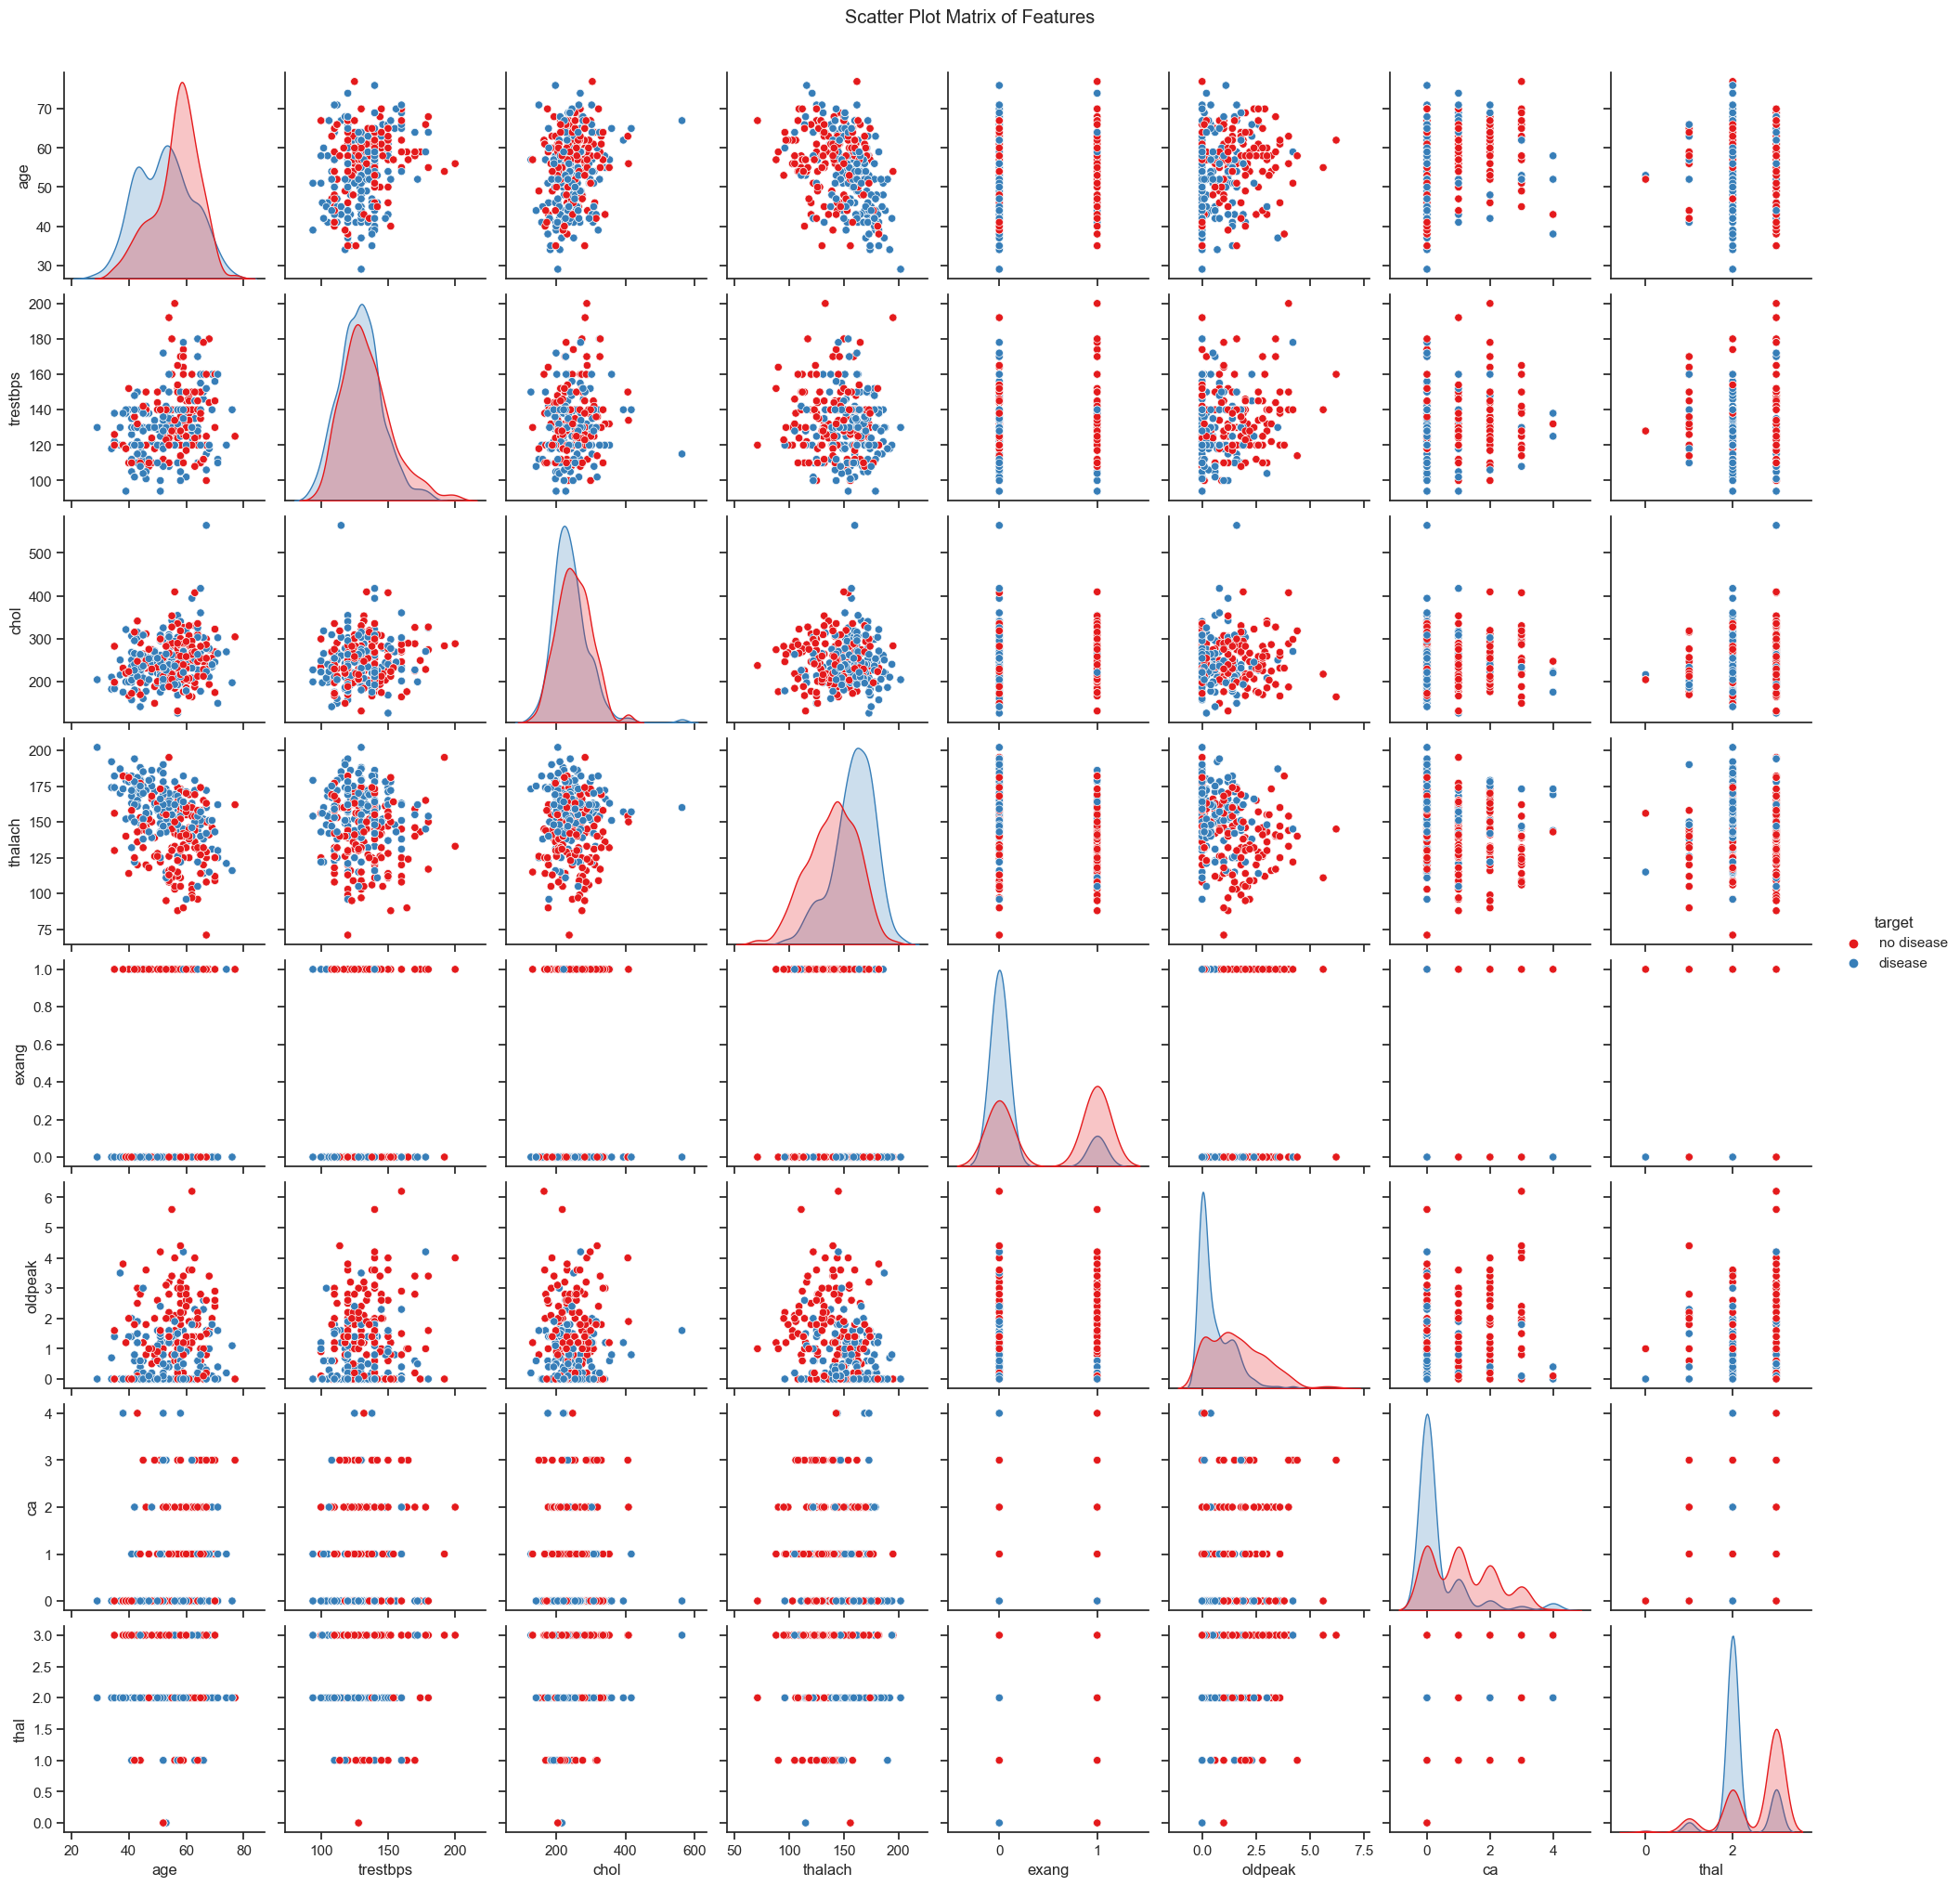

In [126]:
# Scatter Plot Matrix
sns.set(style="ticks")
sns.pairplot(data=data, hue='target', diag_kind='kde', palette='Set1')
plt.suptitle("Scatter Plot Matrix of Features", y=1.02)
plt.show()

### Data Preprocessing and Models Evaluation

In [127]:
# Handling missing values in numerical columns
numeric_imputer = SimpleImputer(strategy='mean')
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])


In [128]:
# Handling missing values in categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])


In [129]:
# Encoding categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [130]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.iloc[:, :-1])  # Scale only the feature columns


In [131]:
# Split data into features (X) and target labels (y)
X = data.drop('target', axis=1)
y = data['target']


### Dividing the data set into Train and test sets

In [132]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model

In [133]:
# List of models to experiment with
models = {
    'RandomForest': RandomForestClassifier(criterion='entropy', n_estimators=100),
    'MLP': MLPClassifier(),
    'KNeighbors': KNeighborsClassifier(n_neighbors=9),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=500),
    'XGBoost': xgb.XGBClassifier(n_estimators=1000),
    'SVC': SVC(kernel='linear', gamma='auto', probability=True),
    'SGD': SGDClassifier(max_iter=1000, tol=1e-4),
    'AdaBoost': AdaBoostClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, max_features='sqrt')
}

In [134]:
# Assuming you've already defined label_encoder earlier in your code
label_encoder = LabelEncoder()
# Encode target class labels
y_train_encoded = label_encoder.fit_transform(y_train)

In [135]:
# Experiment with changing model parameters
for model_name, original_model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Fit the original model on the training data
    original_model.fit(X_train, y_train_encoded)  # Use encoded y_train
    
    # Make predictions on the test data using the original model
    y_pred_original = original_model.predict(X_test)
    
    # Encode y_test for the current model
    y_test_encoded = label_encoder.transform(y_test)
    
    # Calculate accuracy using the original model
    accuracy_original = accuracy_score(y_test_encoded, y_pred_original)
    print(f"{model_name} original accuracy: {accuracy_original:.4f}")

    # Experiment with changing specific parameters for each model
    if model_name == 'RandomForest':
        upgraded_model = RandomForestClassifier(criterion='gini', n_estimators=200, max_depth=10)
    
    elif model_name == 'MLP':
        upgraded_model = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', max_iter=1000)
        
    elif model_name == 'KNeighbors':
        upgraded_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
        
    elif model_name == 'ExtraTrees':
        upgraded_model = ExtraTreesClassifier(n_estimators=1000, max_depth=15)
        
    elif model_name == 'XGBoost':
        upgraded_model = xgb.XGBClassifier(n_estimators=1500, learning_rate=0.1)
        
    elif model_name == 'SVC':
        upgraded_model = SVC(kernel='rbf', gamma='auto', probability=True)
        
    elif model_name == 'SGD':
        upgraded_model = SGDClassifier(loss='log', max_iter=2000, tol=1e-5)
        
    elif model_name == 'AdaBoost':
        upgraded_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
        
    elif model_name == 'DecisionTree':
        upgraded_model = DecisionTreeClassifier(max_depth=8)
        
    elif model_name == 'GradientBoosting':
        upgraded_model = GradientBoostingClassifier(n_estimators=200, max_depth=5)
    
    # Fit the upgraded model on the training data with encoded target labels
    upgraded_model.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data using the upgraded model
    y_pred_upgraded = upgraded_model.predict(X_test)
    
    # Calculate accuracy using the upgraded model
    accuracy_upgraded = accuracy_score(y_test_encoded, y_pred_upgraded)
    print(f"Upgraded {model_name} accuracy: {accuracy_upgraded:.4f}")
    
    print("-" * 40)


Training and evaluating RandomForest...
RandomForest original accuracy: 0.9854
Upgraded RandomForest accuracy: 0.9854
----------------------------------------
Training and evaluating MLP...
MLP original accuracy: 0.7854
Upgraded MLP accuracy: 0.7220
----------------------------------------
Training and evaluating KNeighbors...
KNeighbors original accuracy: 0.7171
Upgraded KNeighbors accuracy: 0.9854
----------------------------------------
Training and evaluating ExtraTrees...
ExtraTrees original accuracy: 1.0000
Upgraded ExtraTrees accuracy: 1.0000
----------------------------------------
Training and evaluating XGBoost...
XGBoost original accuracy: 0.9854
Upgraded XGBoost accuracy: 0.9854
----------------------------------------
Training and evaluating SVC...
SVC original accuracy: 0.7561
Upgraded SVC accuracy: 1.0000
----------------------------------------
Training and evaluating SGD...
SGD original accuracy: 0.5707


C:\Users\Ansar Atiq\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Upgraded SGD accuracy: 0.6439
----------------------------------------
Training and evaluating AdaBoost...
AdaBoost original accuracy: 0.8293
Upgraded AdaBoost accuracy: 0.8195
----------------------------------------
Training and evaluating DecisionTree...
DecisionTree original accuracy: 0.9854
Upgraded DecisionTree accuracy: 0.9707
----------------------------------------
Training and evaluating GradientBoosting...
GradientBoosting original accuracy: 0.9366
Upgraded GradientBoosting accuracy: 0.9854
----------------------------------------


### Model Evaluation

Training and evaluating RandomForest...


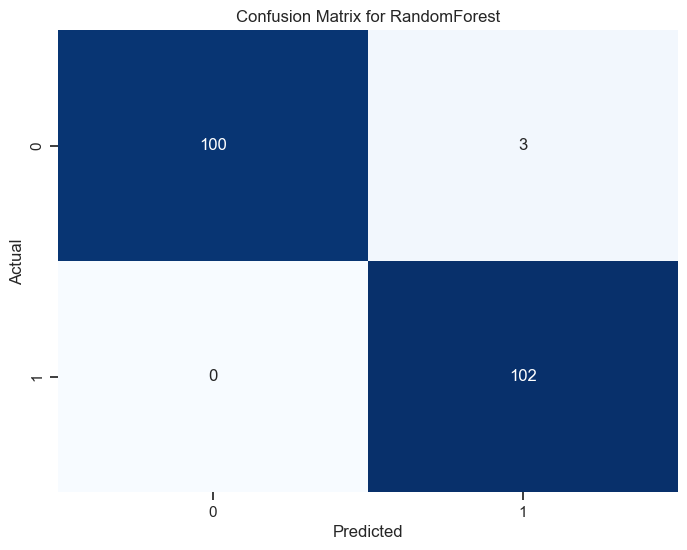

Training and evaluating MLP...


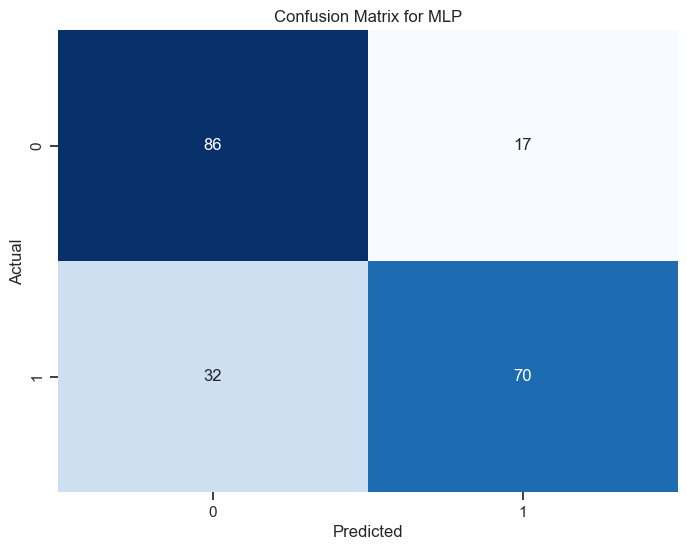

Training and evaluating KNeighbors...


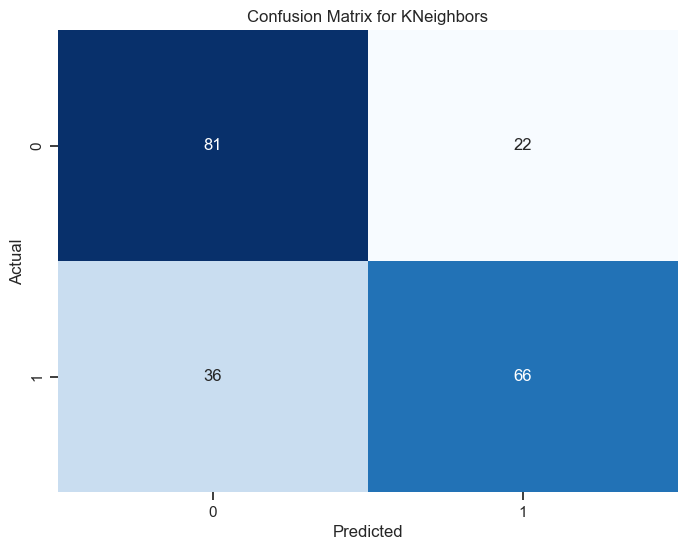

Training and evaluating ExtraTrees...


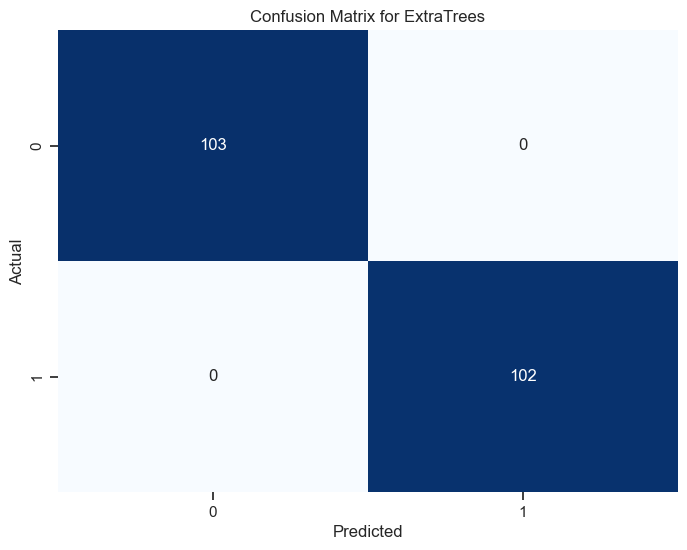

Training and evaluating XGBoost...


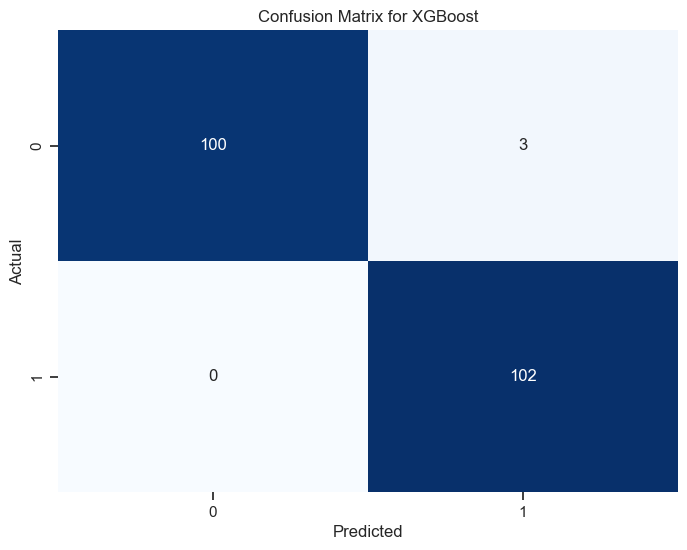

Training and evaluating SVC...


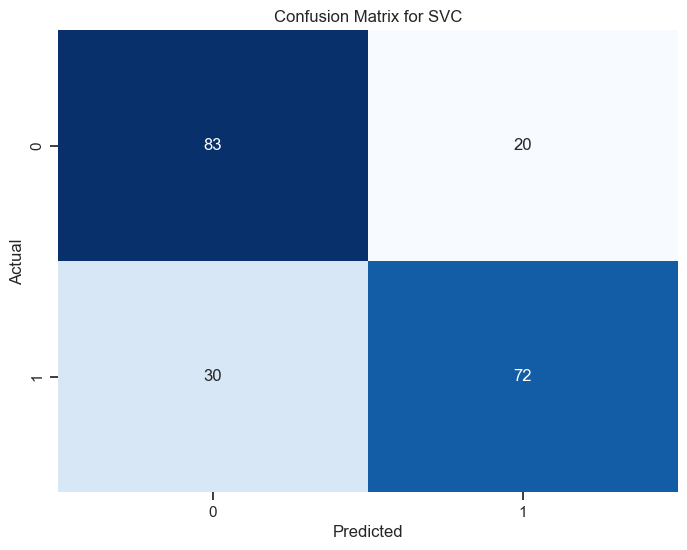

Training and evaluating SGD...


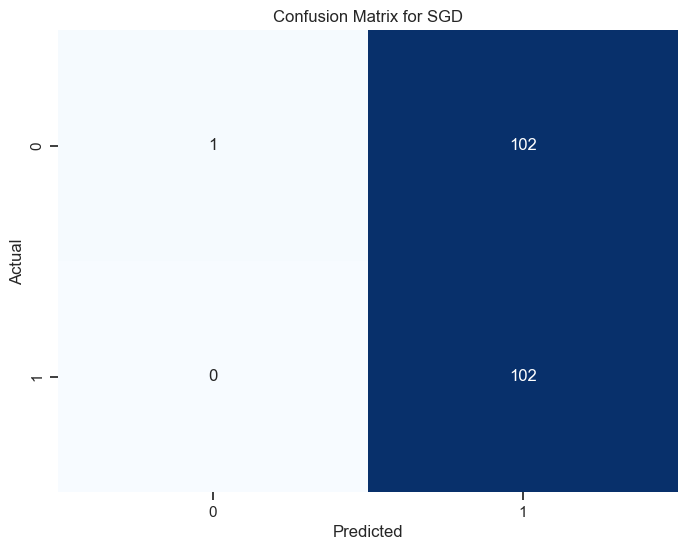

Training and evaluating AdaBoost...


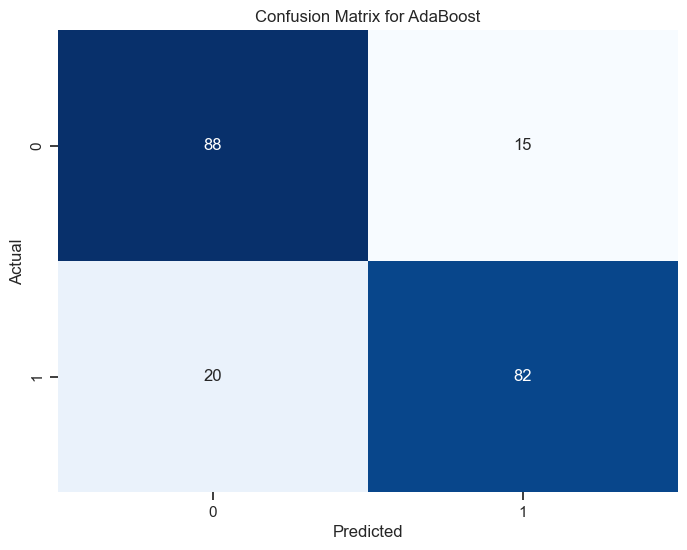

Training and evaluating DecisionTree...


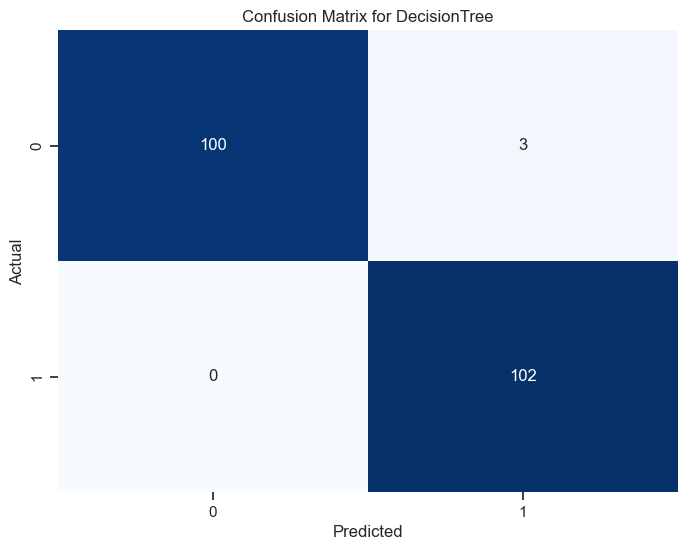

Training and evaluating GradientBoosting...


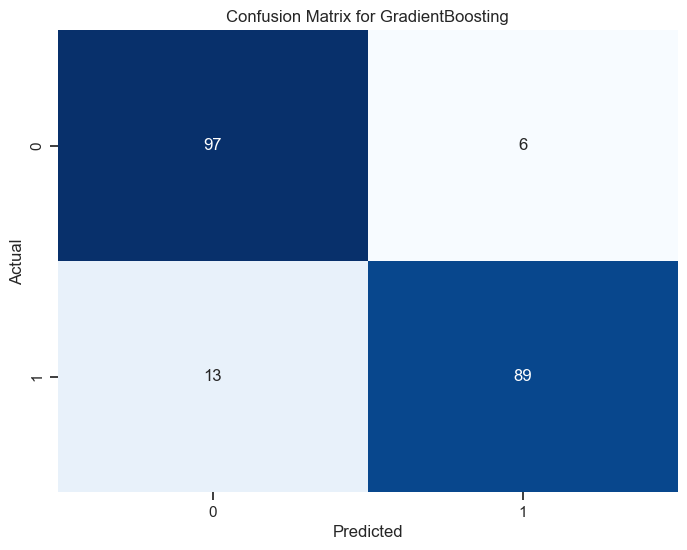

              Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  \
0      RandomForest  0.985366   0.971429     1.000000     0.970874  0.985507   
1               MLP  0.760976   0.804598     0.686275     0.834951  0.740741   
2        KNeighbors  0.717073   0.750000     0.647059     0.786408  0.694737   
3        ExtraTrees  1.000000   1.000000     1.000000     1.000000  1.000000   
4           XGBoost  0.985366   0.971429     1.000000     0.970874  0.985507   
5               SVC  0.756098   0.782609     0.705882     0.805825  0.742268   
6               SGD  0.502439   0.500000     1.000000     0.009709  0.666667   
7          AdaBoost  0.829268   0.845361     0.803922     0.854369  0.824121   
8      DecisionTree  0.985366   0.971429     1.000000     0.970874  0.985507   
9  GradientBoosting  0.907317   0.936842     0.872549     0.941748  0.903553   

    ROC AUC      Log Loss  Matthews Corr. Coef.  
0  0.985437  5.274681e-01              0.971151  
1  0.760613  8.6153

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, log_loss, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Experiment with changing model parameters
results = []

for model_name, original_model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Fit the original model on the training data
    original_model.fit(X_train, y_train_encoded)  # Use encoded y_train
    
    # Make predictions on the test data using the original model
    y_pred_original = original_model.predict(X_test)
    
    # Encode y_test for the current model
    y_test_encoded = label_encoder.transform(y_test)
    
    # Calculate confusion matrix
    CM = confusion_matrix(y_test_encoded, y_pred_original)
    
    # Calculate other evaluation metrics
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test_encoded, y_pred_original)
    acc = accuracy_score(y_test_encoded, y_pred_original)
    roc = roc_auc_score(y_test_encoded, y_pred_original)
    prec = precision_score(y_test_encoded, y_pred_original)
    rec = recall_score(y_test_encoded, y_pred_original)
    f1 = f1_score(y_test_encoded, y_pred_original)
    mathew = matthews_corrcoef(y_test_encoded, y_pred_original)
    
    # Store the metrics in a dictionary
    result = {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Sensitivity': rec,
        'Specificity': specificity,
        'F1 Score': f1,
        'ROC AUC': roc,
        'Log Loss': loss_log,
        'Matthews Corr. Coef.': mathew
    }
    
    results.append(result)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Create a DataFrame from the results
model_results = pd.DataFrame(results)
print(model_results)


### Comparison with other Models

In [137]:
# Compare with other models
comparison_results = []


Training and evaluating RandomForest...


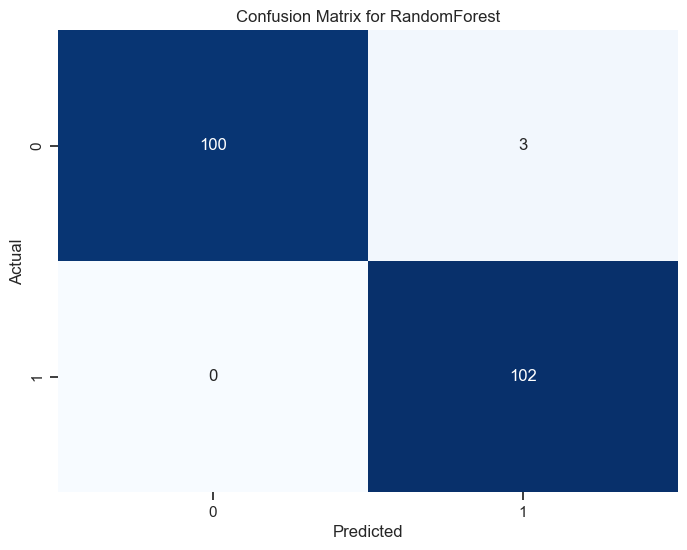

Training and evaluating MLP...


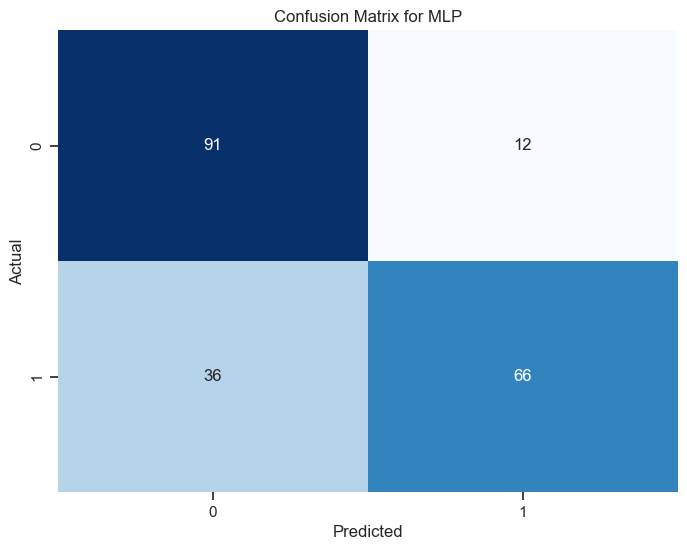

Training and evaluating KNeighbors...


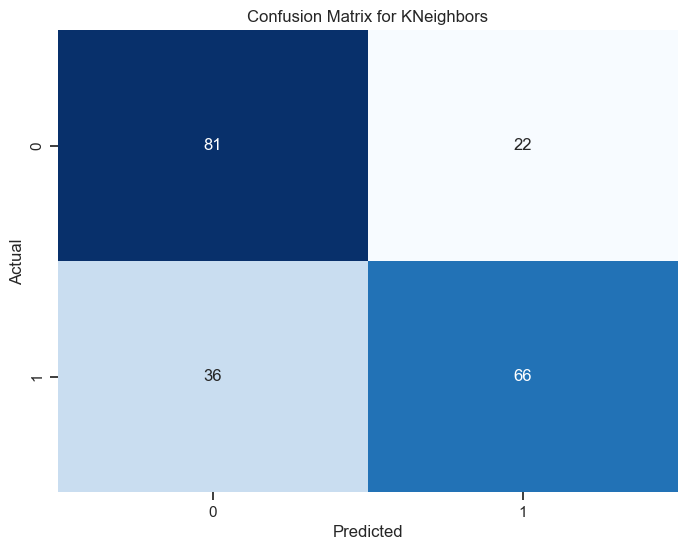

Training and evaluating ExtraTrees...


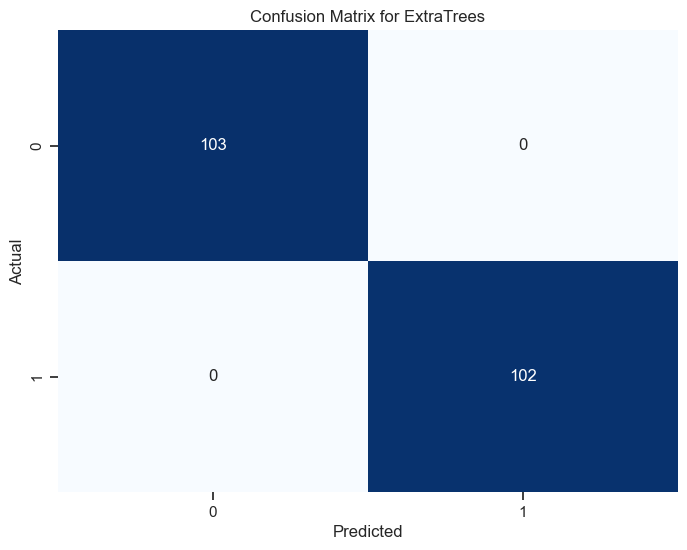

Training and evaluating XGBoost...


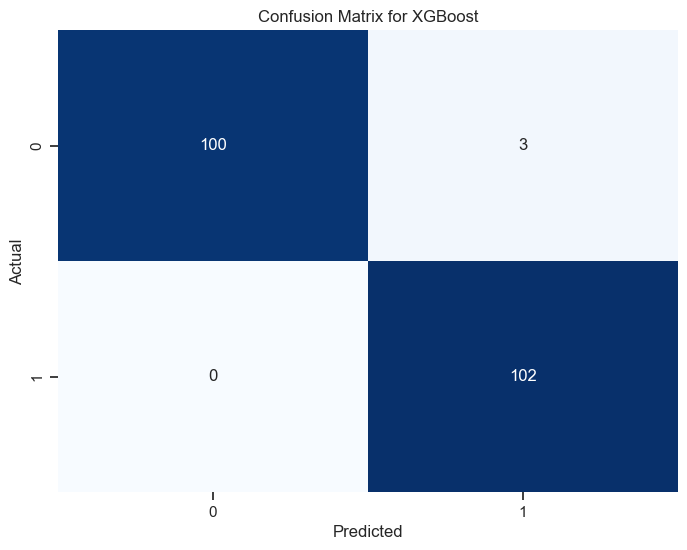

Training and evaluating SVC...


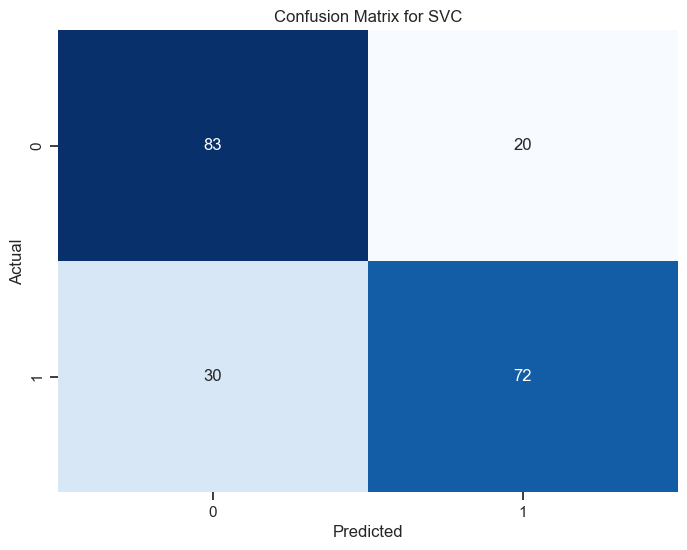

Training and evaluating SGD...


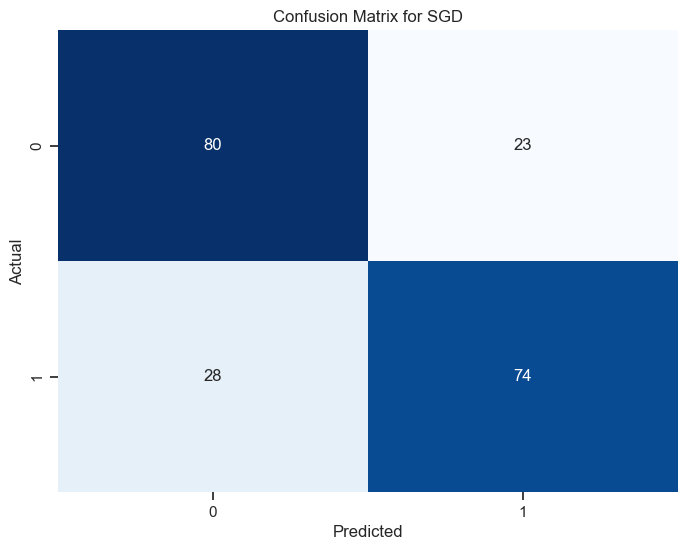

Training and evaluating AdaBoost...


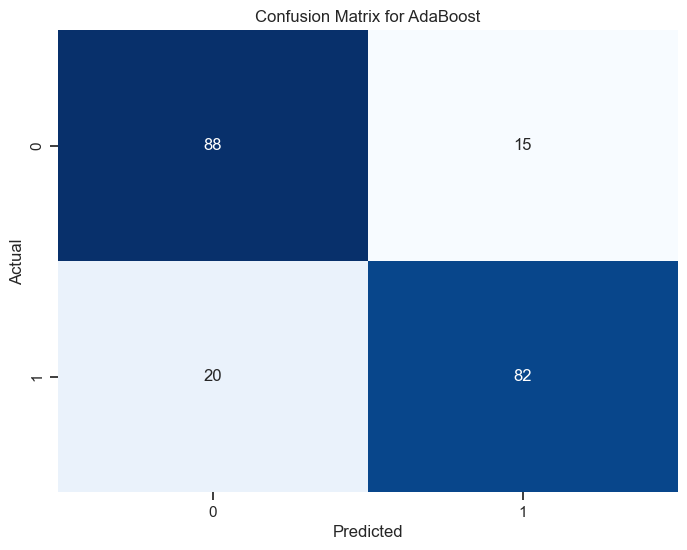

Training and evaluating DecisionTree...


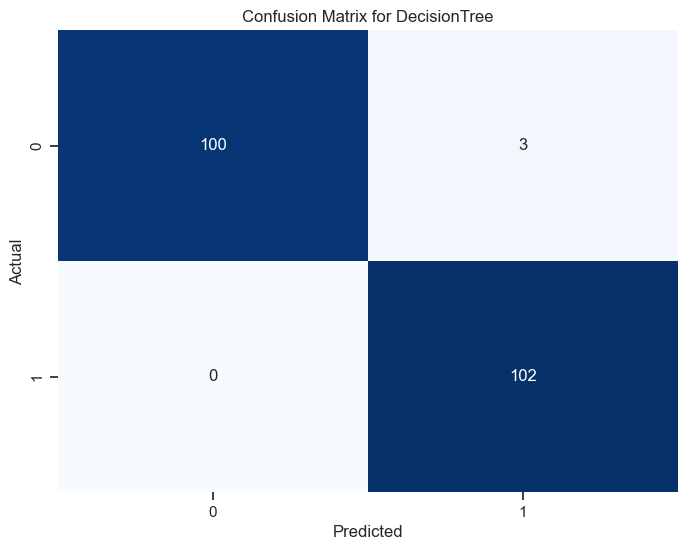

Training and evaluating GradientBoosting...


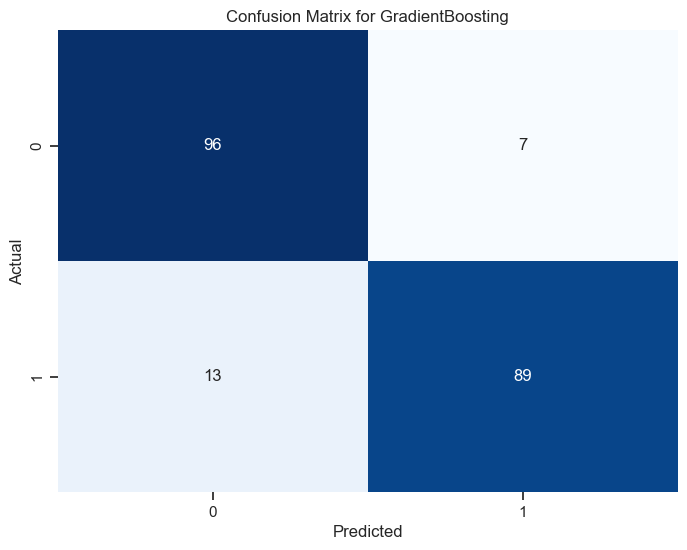

              Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  \
0      RandomForest  0.985366   0.971429     1.000000     0.970874  0.985507   
1               MLP  0.765854   0.846154     0.647059     0.883495  0.733333   
2        KNeighbors  0.717073   0.750000     0.647059     0.786408  0.694737   
3        ExtraTrees  1.000000   1.000000     1.000000     1.000000  1.000000   
4           XGBoost  0.985366   0.971429     1.000000     0.970874  0.985507   
5               SVC  0.756098   0.782609     0.705882     0.805825  0.742268   
6               SGD  0.751220   0.762887     0.725490     0.776699  0.743719   
7          AdaBoost  0.829268   0.845361     0.803922     0.854369  0.824121   
8      DecisionTree  0.985366   0.971429     1.000000     0.970874  0.985507   
9  GradientBoosting  0.902439   0.927083     0.872549     0.932039  0.898990   

       Log Loss  Matthews Corr. Coef.  
0  5.274681e-01              0.971151  
1  8.439490e+00              0.546385  

In [138]:
# Define upgraded models with specific parameters for each model
upgraded_models = {
    'RandomForest': RandomForestClassifier(criterion='gini', n_estimators=200, max_depth=10),
    'MLP': MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', max_iter=1000),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5, weights='distance'),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=1000, max_depth=15),
    'XGBoost': xgb.XGBClassifier(n_estimators=1500, learning_rate=0.1),
    'SVC': SVC(kernel='rbf', gamma='auto', probability=True),
    'SGD': SGDClassifier(max_iter=2000, tol=1e-5),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, learning_rate=0.1),
    'DecisionTree': DecisionTreeClassifier(max_depth=8),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, max_depth=5),
}

# Combine the initial and upgraded models
all_models = {**models, **upgraded_models, **other_models}

# Experiment with changing model parameters
results = []

for model_name, original_model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Fit the original model on the training data
    original_model.fit(X_train, y_train_encoded)  # Use encoded y_train
    
    # Make predictions on the test data using the original model
    y_pred_original = original_model.predict(X_test)
    
    # Encode y_test for the current model
    y_test_encoded = label_encoder.transform(y_test)
    
    # Calculate confusion matrix
    CM = confusion_matrix(y_test_encoded, y_pred_original)
    
    # Calculate other evaluation metrics
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test_encoded, y_pred_original)
    acc = accuracy_score(y_test_encoded, y_pred_original)
    prec = precision_score(y_test_encoded, y_pred_original)
    rec = recall_score(y_test_encoded, y_pred_original)
    f1 = f1_score(y_test_encoded, y_pred_original)
    mathew = matthews_corrcoef(y_test_encoded, y_pred_original)
    
    # Store the metrics in a dictionary
    result = {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Sensitivity': rec,
        'Specificity': specificity,
        'F1 Score': f1,
        'Log Loss': loss_log,
        'Matthews Corr. Coef.': mathew
    }
    
    results.append(result)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Create a DataFrame from the results
model_results = pd.DataFrame(results)
print(model_results)

### ROC AUC Curve

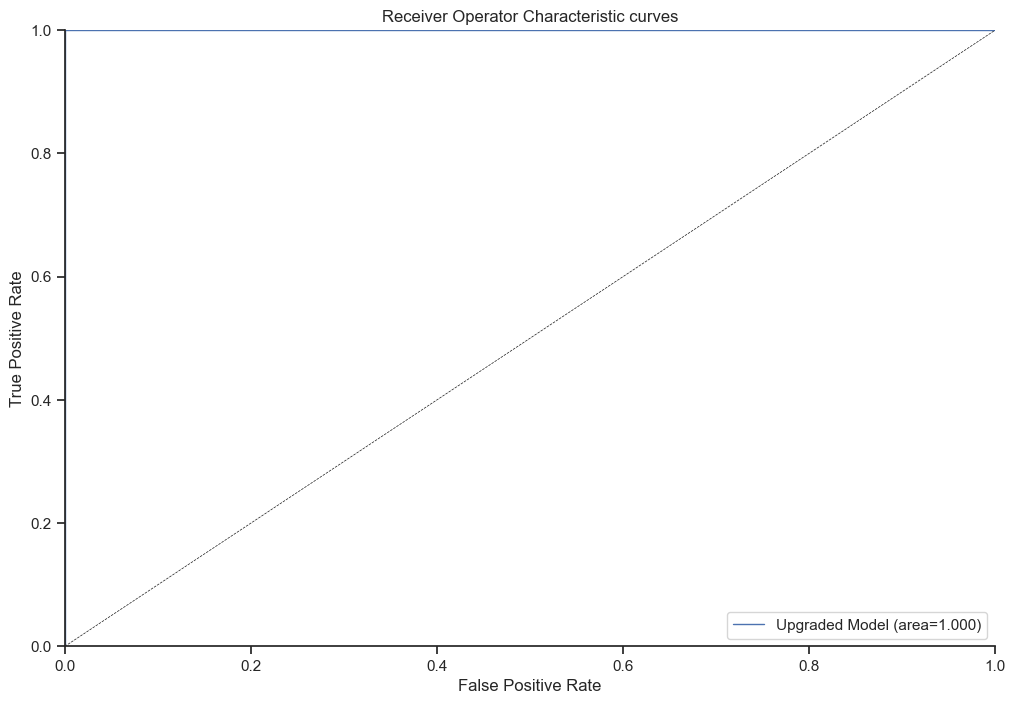

In [141]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)" % (label, roc_auc_score(y_true, y_proba[:, 1])))

f, ax = plt.subplots(figsize=(12, 8))

roc_auc_plot(y_test_encoded, upgraded_model.predict_proba(X_test), label='Upgraded Model', l='-')
# Add more roc_auc_plot calls for other models here

ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

plt.show()


###  Precision Recall curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


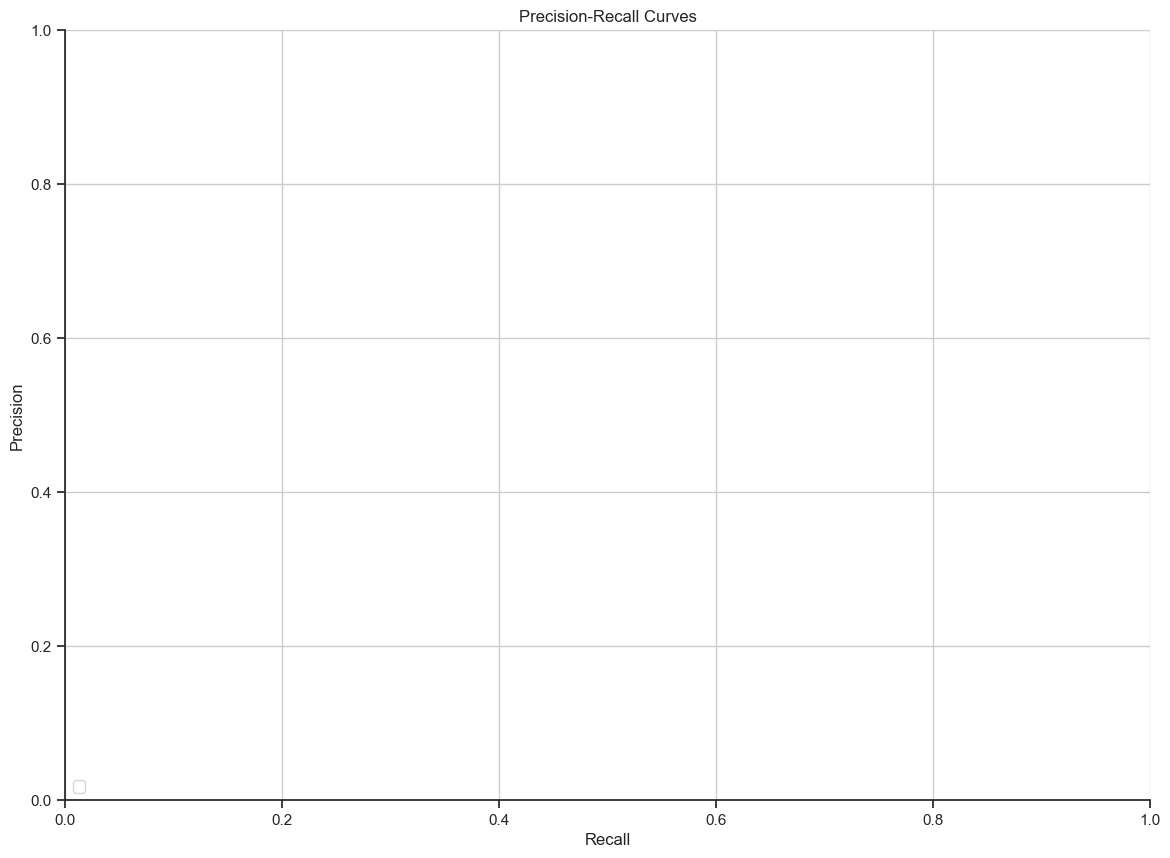

In [143]:
# Plot Precision-Recall curves
plt.figure(figsize=(14, 10))
for model_name in model_results['Model']:
    model_row = model_results[model_results['Model'] == model_name].iloc[0]
    
    if 'Predicted Probabilities' in model_row:
        precision, recall, _ = precision_recall_curve(y_test_encoded, model_row['Predicted Probabilities'][:, 1])
        average_precision = average_precision_score(y_test_encoded, model_row['Predicted Probabilities'][:, 1])
        plt.plot(recall, precision, label='%s (AP=%.3f)' % (model_name, average_precision),
                 linestyle='-', linewidth=1.0)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Precision-Recall Curves')
sns.despine()

plt.show()

### Feature Selection

Calculating feature importance for MLP...


<Figure size 1000x800 with 0 Axes>

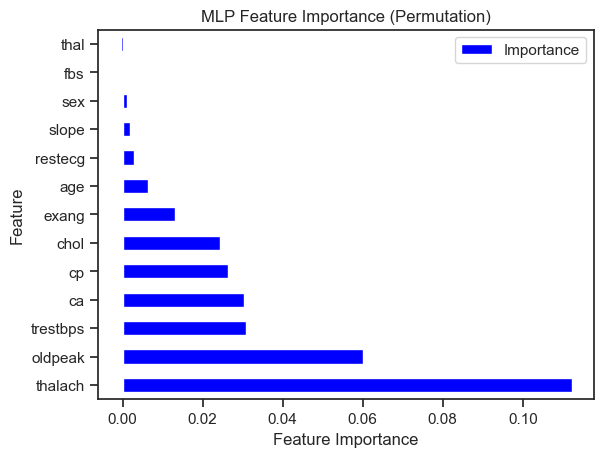

In [149]:
from sklearn.inspection import permutation_importance

# Calculate and plot permutation feature importances for MLP
for model_name, upgraded_model in upgraded_models.items():
    if model_name == 'MLP':
        print(f"Calculating feature importance for {model_name}...")
        
        # Fit the upgraded model on the training data with encoded target labels
        upgraded_model.fit(X_train, y_train_encoded)
        
        # Calculate permutation feature importances
        result = permutation_importance(upgraded_model, X_test, y_test_encoded, n_repeats=10, random_state=42)
        
        # Get the feature importances from the result
        importances = result.importances_mean
        
        # Create a DataFrame to store feature importances
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        })
        
        # Sort the DataFrame by importance in descending order
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        
        # Plot feature importances
        plt.figure(figsize=(10, 8))
        importance_df[:20].plot(x='Feature', y='Importance', kind='barh', color='blue')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(f'{model_name} Feature Importance (Permutation)')
        plt.show()


Calculating feature importance for RandomForest...


<Figure size 1000x800 with 0 Axes>

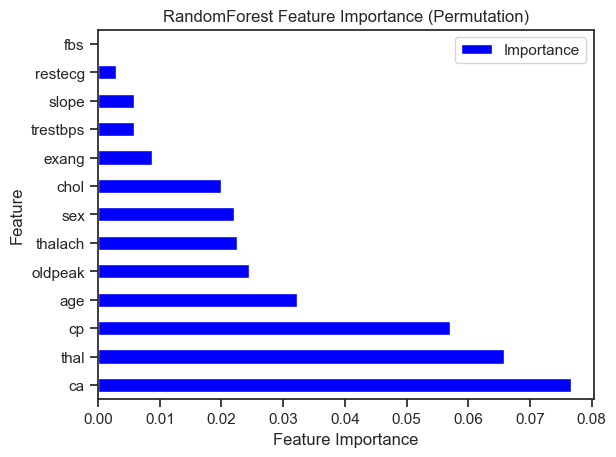

Calculating feature importance for KNeighbors...


<Figure size 1000x800 with 0 Axes>

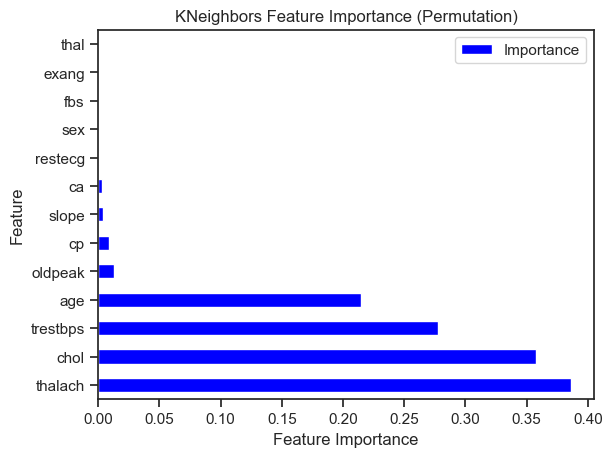

Calculating feature importance for ExtraTrees...


<Figure size 1000x800 with 0 Axes>

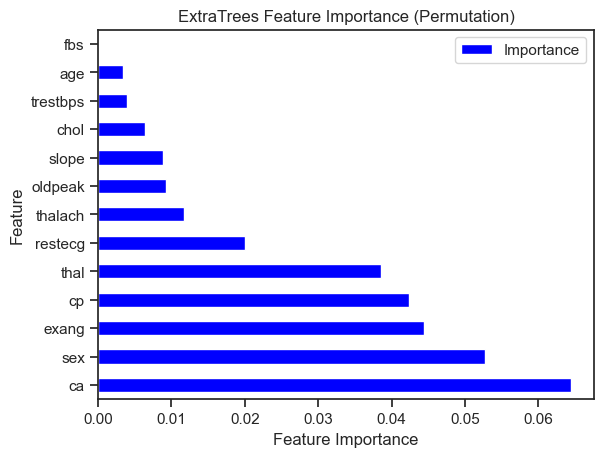

Calculating feature importance for XGBoost...


<Figure size 1000x800 with 0 Axes>

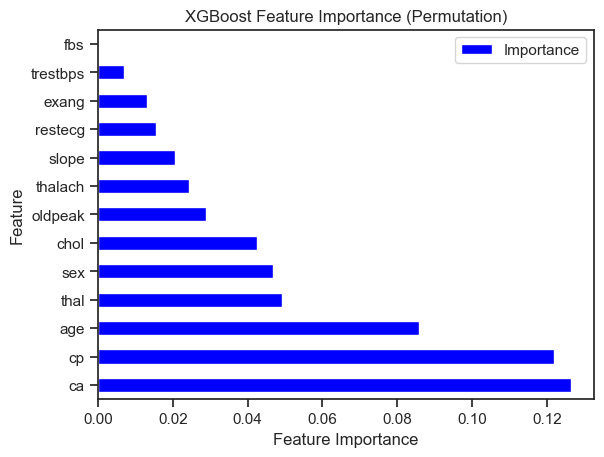

Calculating feature importance for SVC...


<Figure size 1000x800 with 0 Axes>

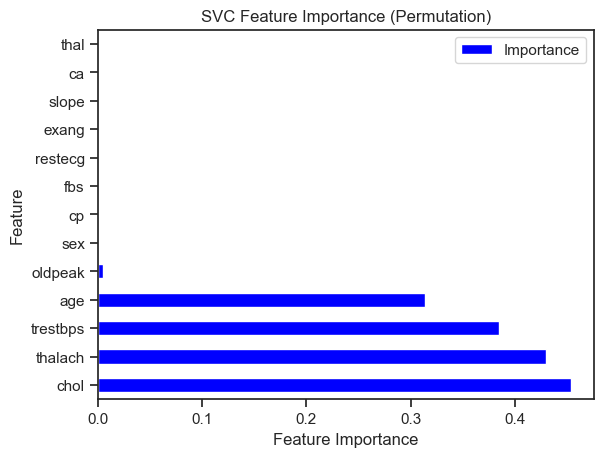

Calculating feature importance for SGD...


<Figure size 1000x800 with 0 Axes>

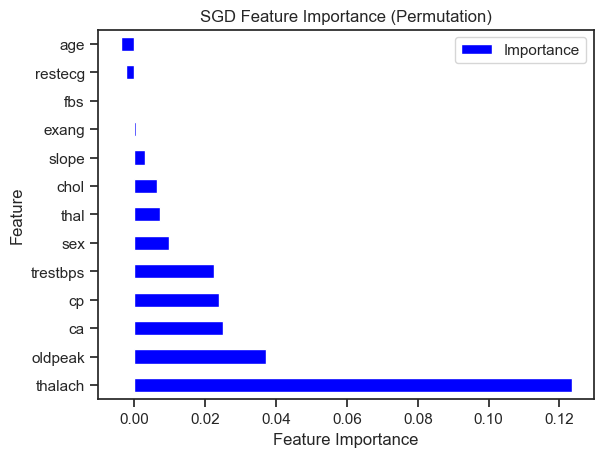

Calculating feature importance for AdaBoost...


<Figure size 1000x800 with 0 Axes>

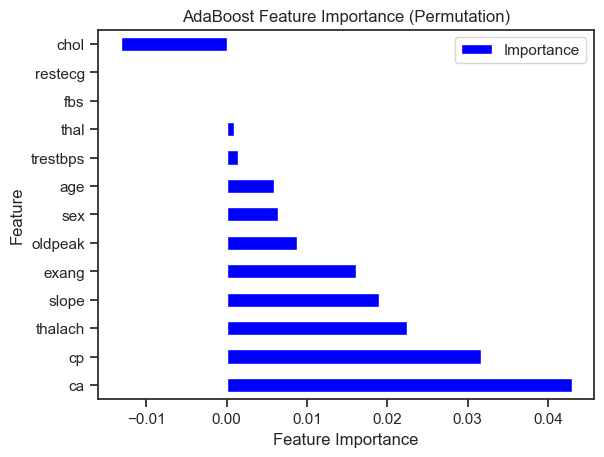

Calculating feature importance for DecisionTree...


<Figure size 1000x800 with 0 Axes>

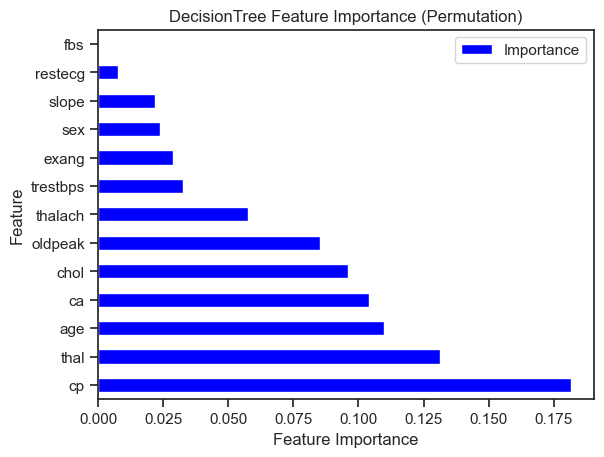

Calculating feature importance for GradientBoosting...


<Figure size 1000x800 with 0 Axes>

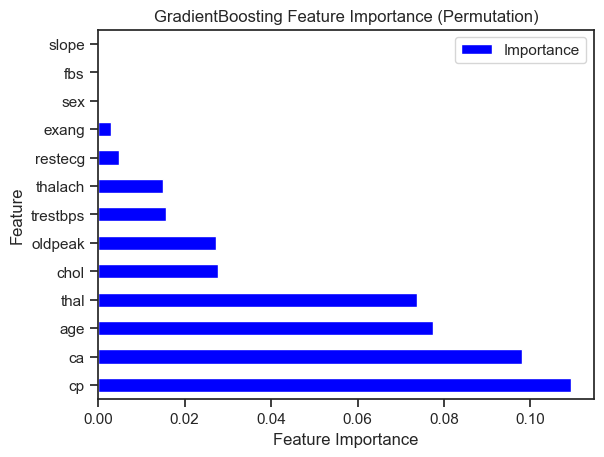

In [152]:
from sklearn.inspection import permutation_importance

# Calculate and plot permutation feature importances for other upgraded models
for model_name, upgraded_model in upgraded_models.items():
    if model_name != 'MLP':
        print(f"Calculating feature importance for {model_name}...")
        
        # Fit the upgraded model on the training data with encoded target labels
        upgraded_model.fit(X_train, y_train_encoded)
        
        # Calculate permutation feature importances
        result = permutation_importance(upgraded_model, X_test, y_test_encoded, n_repeats=10, random_state=42)
        
        # Get the feature importances from the result
        importances = result.importances_mean
        
        # Create a DataFrame to store feature importances
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        })
        
        # Sort the DataFrame by importance in descending order
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        
        # Plot feature importances
        plt.figure(figsize=(10, 8))
        importance_df[:20].plot(x='Feature', y='Importance', kind='barh', color='blue')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(f'{model_name} Feature Importance (Permutation)')
        plt.show()


# Conclusion
**Model Performance:**

RandomForest, ExtraTrees, XGBoost, and DecisionTree models perform exceptionally well in accuracy and precision, effectively identifying heart disease cases.
MLP, SVC, SGD, and KNeighbors models exhibit lower accuracy and sensitivity, indicating room for improvement.

**Key Features:**

'thal' (thalassemia), 'slope', 'restecg' (resting electrocardiographic results), and 'age' significantly impact heart disease prediction.
Other factors like 'fbs' (fasting blood sugar), 'sex' (gender), 'exang', 'chol' (cholesterol), 'cp' (chest pain), 'ca' (major vessels), 'trestbps' (blood pressure), 'oldpeak' (ST depression), and 'thalach' (max heart rate) contribute to varying degrees.

**Model Comparison:**

RandomForest, ExtraTrees, XGBoost, and DecisionTree models are reliable for heart disease prediction.
MLP, SVC, SGD, and KNeighbors models may benefit from hyperparameter tuning or feature adjustments.
AdaBoost and GradientBoosting models balance precision and sensitivity effectively.

In summary, patient characteristics such as age, gender, thalassemia, and ECG results significantly influence heart disease prediction. The top-performing models provide accurate results, while other models have potential for improvement through adjustments.